# Исследование и выявление закономерностей успешности видеоигр.

Исследуется деятельность интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В работе нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Имеются данные до 2016 года, планируется кампания на 2017-й.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Файл с данными. Общая информация:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('D://Education//Module_4-1 (Final Project)//games.csv')

### **Основная информация датафрейма (метода info()):**

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### **Первые 10 строк датафрейма:**

In [4]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### **Первичное описание имеющихся данных:**

•	**Name** — название игры  
•	**Platform** — платформа  
•	**Year_of_Release** — год выпуска  
•	**Genre** — жанр игры  
•	**NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
•	**EU_sales** — продажи в Европе (миллионы проданных копий)  
•	**JP_sales** — продажи в Японии (миллионы проданных копий)  
•	**Other_sales** — продажи в других странах (миллионы проданных копий)  
•	**Critic_Score** — оценка критиков (максимум 100)  
•	**User_Score** — оценка пользователей (максимум 10)  
•	**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### **Исследование количества пропусков данных по столбцам:**

In [5]:
print(data.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


### **Гистограммы по столбцам датафрейма:**

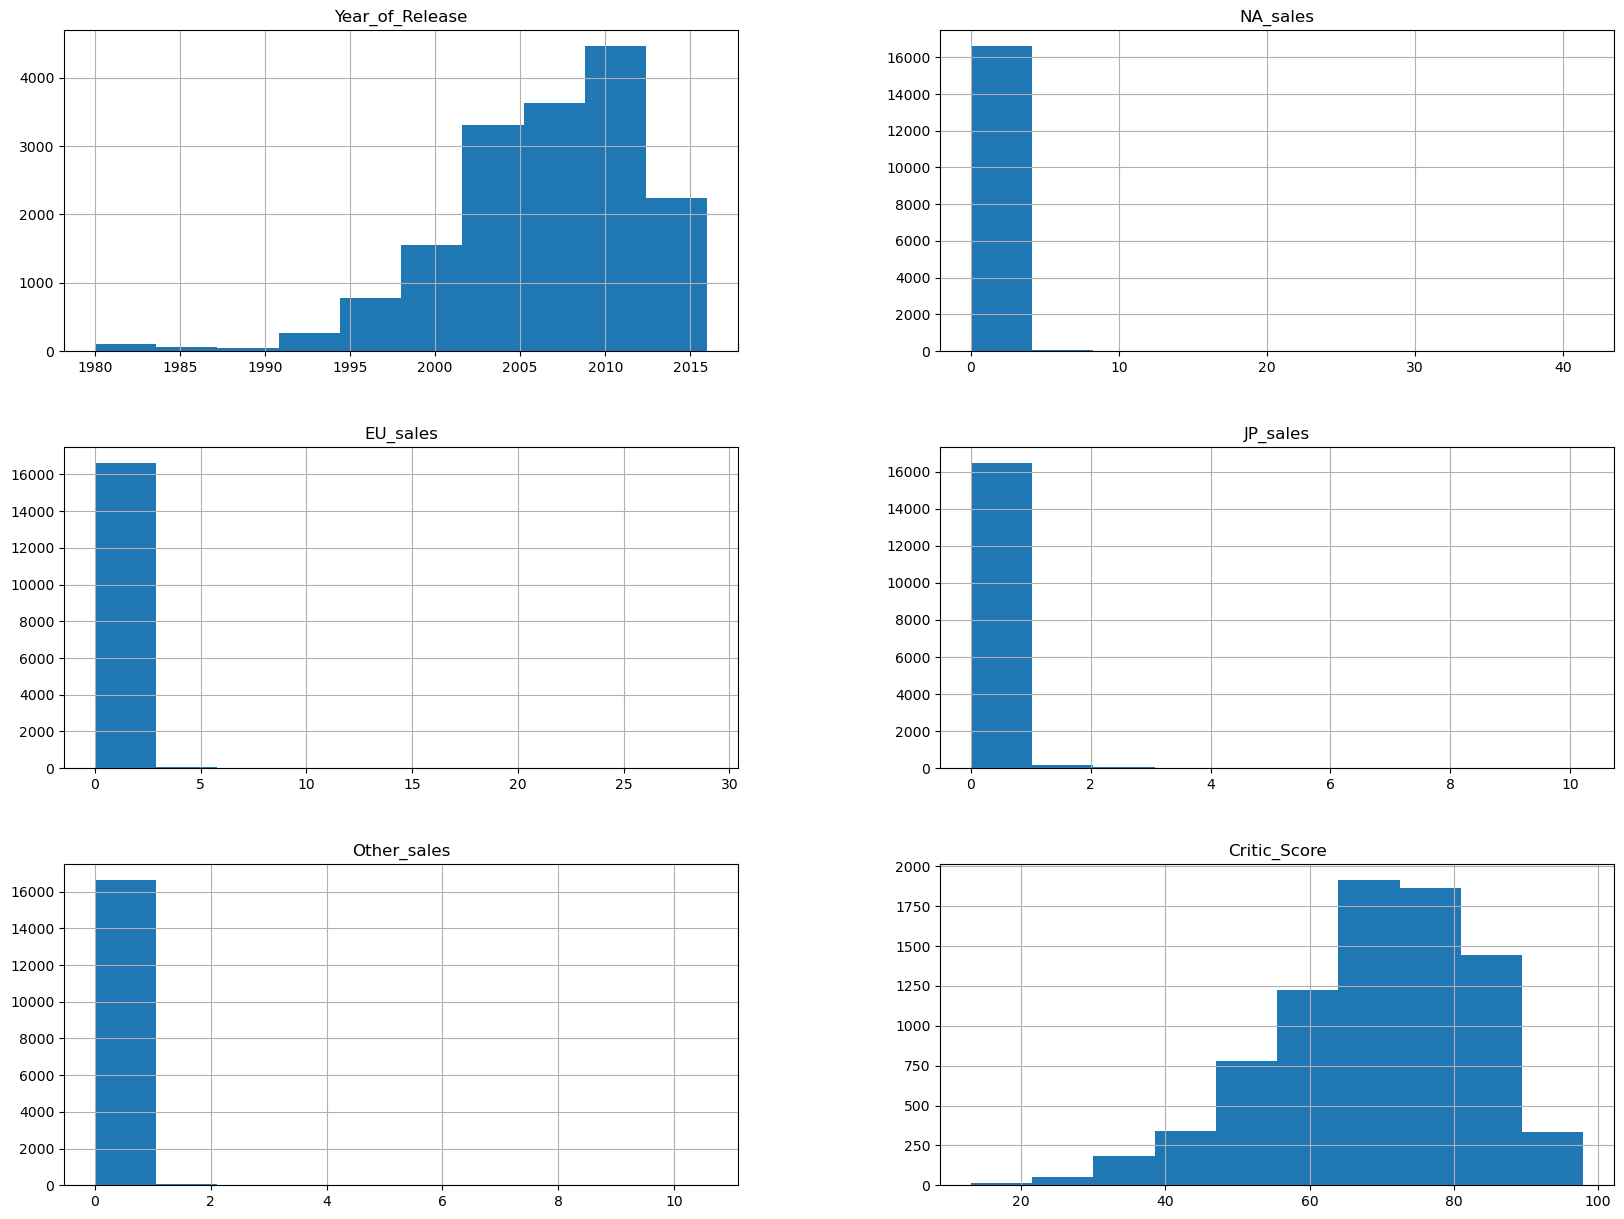

In [6]:
data.hist(figsize=(20, 15));

**При первичном анализе данных выявлены несоответствия формата данных (столбцы 'Year_of_Release' и 'User_Score') и пропуски данных в столбцах.**

## Подготовка данных для анализа:

### **Замена названий столбцов (приведение к нижнему регистру):**

In [7]:
data.columns = data.columns.str.lower()
print(data.head(0))

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


### **Преобразование данных в нужные типы:**

#### **Преобразуем данные в столбце 'year_of_release' (год релиза) в 'Int':**

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
print(data['year_of_release'].dtypes)

Int64


**Перед преобразованием типов данных в столбце 'user_score' необходимо обработать пропуски, а также иные 'нечисловые' значения:**

In [9]:
print(data['user_score'].value_counts().head(1))

tbd    2424
Name: user_score, dtype: int64


В толбце 'user_score' помимо числовых оценок, присутствует **аббревиатура 'TBD'** (в количестве 2424 строки), означающая 'to be termined' - 'будет определена (позднее)'.  

Так как на момент проведения анализа оценка не присвоена, логично **заменить 'tbd'** на **'-1'** (заменим на т.н. "заглушку").

In [10]:
data['user_score'] = data['user_score'].replace('tbd', -1)

#### **Преобразуем данные в столбце 'user_score' (оценка пользователей) в 'Float':**

In [11]:
data['user_score'] = data['user_score'].astype('float')
print(data['user_score'].dtype)

float64


### **Обработка пропусков:**

**Как указывалось ранее, в столбцах датафрейма присутствуют пропуски значений:**

In [12]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


#### **Пропуски в столбцах 'name' (название игры) и 'genre' (жанр):**

Пропуски в данном столбце вероятнее всего образовались при заполнении базы данных.

In [13]:
display(data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбцах 'name' и 'genre' взаимосвязаны - 2 пропуска. Т.к. по имеющимся данным невозможно установить наименование игры или жанр, и пропусков всего 2, целесообразно удалить данные строки.

In [14]:
data = data.dropna(subset=['name'])
print(data['name'].isna().sum())

0


#### **Пропуски в столбце 'year_of_release' (год релиза):**

Пропуски в данном столбце вероятнее всего образовались при заполнении базы данных.

In [15]:
display(data[data['year_of_release'].isna()].tail(55))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13781,GRID,PC,<NA>,Racing,0.00,0.03,0.00,0.01,87.0,7.9,E
13792,NHL Hitz Pro,GC,<NA>,Sports,0.03,0.01,0.00,0.00,81.0,7.8,E
13874,Luxor: Pharaoh's Challenge,Wii,<NA>,Puzzle,0.01,0.02,0.00,0.00,NaN,-1.0,E
13929,Sega Rally 2006,PS2,<NA>,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
14105,Half-Minute Hero 2,PSP,<NA>,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
14126,Housekeeping,DS,<NA>,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
14141,Major League Baseball 2K8,PSP,<NA>,Sports,0.03,0.00,0.00,0.00,63.0,-1.0,E
14210,Sabre Wulf,GBA,<NA>,Platform,0.02,0.01,0.00,0.00,75.0,8.0,E
14252,Swords,Wii,<NA>,Fighting,0.03,0.00,0.00,0.00,NaN,-1.0,T
14325,Beyond the Labyrinth,3DS,<NA>,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В отношении игровой индустрии известно, что как правило, одна и та-же игра выходит сразу на несколько игровых платформ, и в большинстве случаев, релиз происходит в один и тот же год.  
На выборке из 20 случайных игр проверим, применима ли эта теория в данном случае:

In [16]:
display(data.query('name == "Madden NFL 2004"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [17]:
display(data.query('name == "FIFA Soccer 2004"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [18]:
display(data.query('name == "LEGO Batman: The Videogame"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008,Action,1.75,1.01,0.0,0.29,72.0,8.0,E10+
1519,LEGO Batman: The Videogame,PS3,2008,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,<NA>,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [19]:
display(data.query('name == "wwe Smackdown vs. Raw 2006"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


In [20]:
display(data.query('name == "Space Invaders"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


In [21]:
display(data.query('name == "PDC World Championship Darts 2008"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,<NA>,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.0,0.00,43.0,-1.0,E10+


In [22]:
display(data.query('name == "Freaky Flyers"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10551,Freaky Flyers,PS2,2003,Racing,0.05,0.04,0.0,0.01,66.0,-1.0,T
14532,Freaky Flyers,XB,2003,Racing,0.02,0.01,0.0,0.00,64.0,-1.0,T
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T


In [23]:
display(data.query('name == "Inversion"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12146,Inversion,PS3,2012,Shooter,0.03,0.03,0.0,0.01,56.0,5.4,M
12678,Inversion,X360,2012,Shooter,0.03,0.02,0.0,0.01,53.0,6.5,M
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M


In [24]:
display(data.query('name == "Hakuouki: Shinsengumi Kitan"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.0,0.0,0.0,NaN,NaN,NaN


In [25]:
display(data.query('name == "Virtua Quest"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15754,Virtua Quest,PS2,<NA>,Role-Playing,0.01,0.01,0.0,0.0,53.0,7.6,T
16522,Virtua Quest,GC,<NA>,Role-Playing,0.01,0.00,0.0,0.0,55.0,5.5,T


In [26]:
display(data.query('name == "Rock Band"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,<NA>,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


In [27]:
display(data.query('name == "LEGO Indiana Jones: The Original Adventures"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
329,LEGO Indiana Jones: The Original Adventures,X360,2008,Action,2.40,1.01,0.0,0.36,77.0,7.5,E10+
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+
743,LEGO Indiana Jones: The Original Adventures,DS,2008,Action,1.40,0.59,0.0,0.20,80.0,7.9,E
1408,LEGO Indiana Jones: The Original Adventures,PS2,2008,Action,0.60,0.01,0.0,0.76,77.0,8.4,E10+
1723,LEGO Indiana Jones: The Original Adventures,PSP,2008,Action,0.40,0.48,0.0,0.29,76.0,7.6,E10+
2013,LEGO Indiana Jones: The Original Adventures,PS3,2008,Action,0.44,0.42,0.0,0.17,77.0,7.7,E10+
13714,LEGO Indiana Jones: The Original Adventures,PC,2008,Action,0.02,0.02,0.0,0.00,78.0,7.7,E10+


In [28]:
display(data.query('name == "Call of Duty 3"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
557,Call of Duty 3,X360,2006,Shooter,1.49,0.92,0.02,0.27,82.0,6.5,T
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
1255,Call of Duty 3,PS3,2006,Shooter,0.60,0.62,0.03,0.26,80.0,6.9,T
1915,Call of Duty 3,PS2,2006,Shooter,0.89,0.03,0.00,0.15,82.0,7.4,T


In [29]:
display(data.query('name == "Triple Play 99"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,Triple Play 99,PS,<NA>,Sports,0.81,0.55,0.0,0.1,NaN,NaN,NaN


In [30]:
display(data.query('name == "LEGO Harry Potter: Years 5-7"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1609,LEGO Harry Potter: Years 5-7,Wii,<NA>,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+
2132,LEGO Harry Potter: Years 5-7,X360,<NA>,Action,0.51,0.37,0.0,0.09,77.0,7.9,E10+
2273,LEGO Harry Potter: Years 5-7,PS3,<NA>,Action,0.36,0.41,0.0,0.15,76.0,8.3,E10+
3081,LEGO Harry Potter: Years 5-7,DS,<NA>,Action,0.34,0.25,0.0,0.07,69.0,-1.0,E10+
4818,LEGO Harry Potter: Years 5-7,3DS,<NA>,Action,0.18,0.19,0.0,0.03,71.0,6.5,E10+
6476,LEGO Harry Potter: Years 5-7,PSP,<NA>,Action,0.10,0.10,0.0,0.06,NaN,-1.0,E10+
7210,LEGO Harry Potter: Years 5-7,PC,<NA>,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+
8059,LEGO Harry Potter: Years 5-7,PSV,2012,Action,0.07,0.07,0.0,0.03,64.0,6.8,E10+


In [31]:
display(data.query('name == "Wheel of Fortune"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1577,Wheel of Fortune,PS,1998,Misc,0.99,0.22,0.0,0.04,NaN,NaN,NaN
2124,Wheel of Fortune,Wii,2010,Misc,0.86,0.04,0.0,0.06,NaN,7.6,E
2157,Wheel of Fortune,PS2,<NA>,Misc,0.47,0.36,0.0,0.12,NaN,-1.0,E
4662,Wheel of Fortune,DS,2010,Misc,0.39,0.00,0.0,0.03,NaN,-1.0,E
6670,Wheel of Fortune,N64,1997,Misc,0.20,0.05,0.0,0.00,NaN,NaN,NaN


In [32]:
display(data.query('name == "Yakuza 4"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2169,Yakuza 4,PS3,<NA>,Action,0.15,0.13,0.63,0.05,78.0,8.0,M


In [33]:
display(data.query('name == "Rhythm Heaven"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
444,Rhythm Heaven,DS,2008,Misc,0.55,0.5,1.93,0.13,83.0,9.0,E
2361,Rhythm Heaven,Wii,<NA>,Misc,0.11,0.0,0.77,0.01,NaN,NaN,NaN


In [34]:
display(data.query('name == "Namco Museum"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
266,Namco Museum,GBA,2001,Misc,3.00,1.11,0.05,0.07,79.0,7.3,E
961,Namco Museum,PS2,2001,Misc,1.73,0.07,0.00,0.02,72.0,6.0,E
2281,Namco Museum,XB,<NA>,Misc,0.77,0.11,0.00,0.04,59.0,-1.0,E
3215,Namco Museum,GC,2002,Misc,0.48,0.13,0.00,0.02,62.0,-1.0,E


In [35]:
display(data.query('name == "Suikoden III"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2108,Suikoden III,PS2,<NA>,Role-Playing,0.29,0.23,0.38,0.08,86.0,7.7,T


На основании данных по 20 случайно-выбранным просмотренным играм:  
- Для 10 из 20 значений возможно установить год релиза игры, на основании года релиза этой игры на других платформах.  
- При этом, 5 из 20 игр выпускались для единственной платформы (с проверяемым названием), и установить год релиза на основании только имеющихся данных невозможно.  
- Однако есть и случаи (5 из 20), когда игра с проверяемым названием выпускалась для разных платформ в разные годы.  
  
Т.е., если мы заменим отсутствующие значения по вышеописанной логике, то данные примут верные значения примерно в 50% случаев, при этом мы не будем знать наверняка, принято ли верное значение (без проверки каждого пропуска) - использование такого метода нецелесообразно, т.к. подобная замена может исказить анализ данных.

На основании вышеизложенного, удалим строки с отсутствующими значениями.

In [36]:
data = data.dropna(subset=['year_of_release'])
display(data['year_of_release'].isna().sum())

0

#### **Пропуски в столбцах 'critic_score' (оценка критиков) и 'user_score' (оценка пользователей):**

Пропуски в данном столбце вероятнее всего образовались из-за отсутствия оценок.

In [37]:
print('Кол-во пропусков в столбце "critic_score":', data['critic_score'].isna().sum())
print('Кол-во пропусков в столбце "user_score":', data['user_score'].isna().sum())

Кол-во пропусков в столбце "critic_score": 8461
Кол-во пропусков в столбце "user_score": 6605


В столбце 'critic_score' 8578 пропусков, что составляет 51% от количества всех строк.  
В столбце 'user_score' 6699 пропусков, что составляет 40% от количества всех строк.  
Данные об играх начинаются с 1980 года, при этом не указано, из каких источников эти оценки взяты, т.к. существуют разные платформы и сервисы (в т.ч. в других странах), аккумулирующие оценки пользователей или критиков, и ведущие собственную статистику (на примере киноидустрии - IMDB и Кинопоиск). Также следует учитывать, что сервисы и платформы, хранящие оценки пользователей и критиков, в разных странах развивались по разному и в разное время, и в первую очередь связаны с развитием интернета в странах в целом.   
Следует отметить, что заменять пропуски на медианные или средние значения нецелесообразно, т.к. это слишком субъективный параметр, складывающийся из множества факторов у каждого конкретного лица по своему. Более того, одна игра (условно 'Fifa 2002'), может быть воспринята критиками и пользователями хорошо, а её продолжение (условно 'Fifa 2003'), может оказаться наименее успешной.

**Так как в столбце 'user_score' уже произведены замены значений 'tbd' на '-1', логично также поступить и с пропусками в столбцах "critic_score" и "user_score" - заменить на '-1' (заменим на т.н. "заглушку"):**

In [38]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

In [39]:
print(data['critic_score'].isna().sum())

0


In [40]:
print(data['user_score'].isna().sum())

0


#### **Пропуски в столбце 'rating' (рейтинг):**

В столбце 'rating' 6766 пропусков, что составляет 40% от количества всех строк.

Посмотрим уникальные значения в столбце 'rating':

In [41]:
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Создадим новый столбец 'rating_edit', в который поместим значения после обработки пропусков:

In [42]:
data['rating_edit'] = data['rating']

Временно заменим значения 'NaN' на 'temp':

В данном столбце учитывается рейтинг от организации ESRB - Entertainment Software Rating Board - негосударственная организация, основное направление деятельности которой - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения **в США и Канаде**. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»).  
Таким образом, значения в данном столбце проставляются для США и Канады, а для других регионов - нет, чем и может быть обусловлено наличие пропусков.

Заменим пропуски в столбце 'rating_edit' на значение 'not_in_esrb':

In [43]:
data['rating_edit'] = data['rating_edit'].fillna('not_in_esrb')

In [44]:
print('Количество пропусков в столбце "rating_edit":', data['rating_edit'].isna().sum())

Количество пропусков в столбце "rating_edit": 0


Проверим, как функция произвела замену значений:

In [45]:
display(data.head(6))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_edit
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,not_in_esrb
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,not_in_esrb
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN,not_in_esrb


#### **Создадим новый столбец 'total_sales', в котором посчитаем суммарные продажи во всех регионах:**

In [46]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
print(data['total_sales'].head(5))

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64


### **Обработка дубликатов:**

In [47]:
print(data.duplicated().sum())

0


Явные дубликаты в датафрейме отсутствуют.

Неявные дубликаты могут находиться в стоблцах: 'name', 'platform', 'genre'. При этом, значения из указанных столбов в данном исследовании не следует воспринимать как "дубликаты", т.к. они являются конкретными обозначениями определенного параметра, и могут повторяться.  
Неявные дубликаты отсутствуют.

## Исследовательский анализ данных:

### **Определение количества выпущенных игр в разные годы:**

In [48]:
print(data.pivot_table(index='year_of_release', values='name', aggfunc='count'))

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


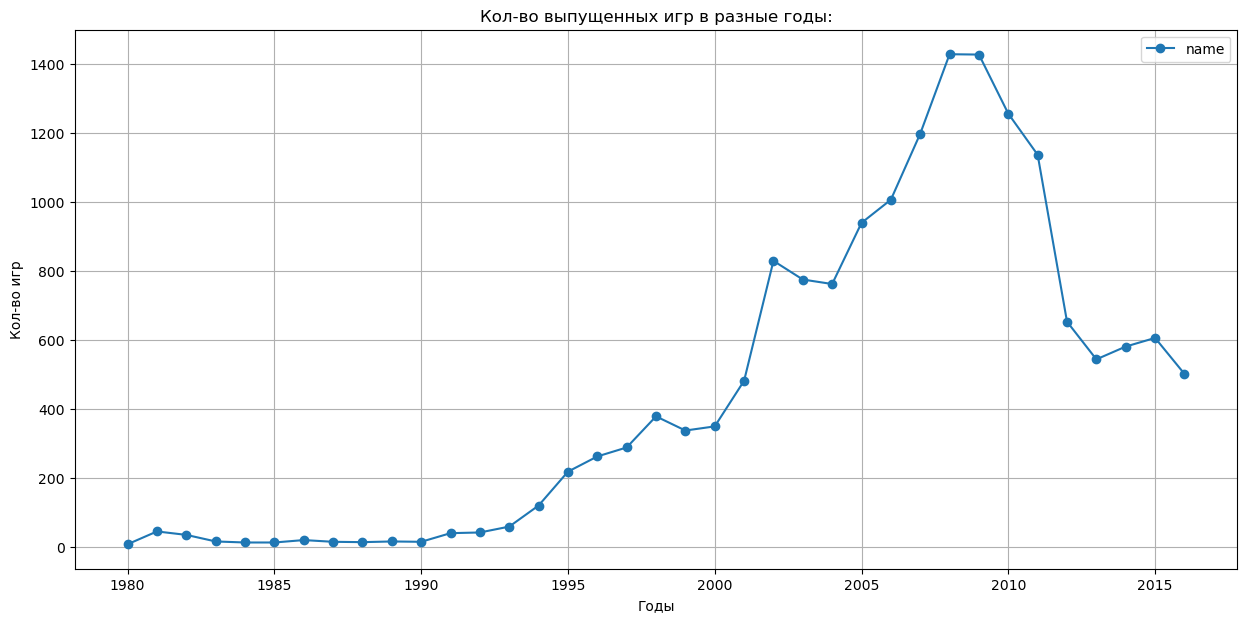

In [49]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(style='o-', grid=True, figsize=(15, 7), title='Кол-во выпущенных игр в разные годы:', xlabel='Годы', ylabel='Кол-во игр');

На графике видно, что в период с 1980 до 1995 годы выпускалось незначительное (до 120) количество игр.  
Начиная с 1995 года выявлен значительный рост количества выпущенных за год игр: *с более чем 200 игр* в 1995 г., до *более чем 1400 игр* в 2008-2009гг.  
Данный рост можно связать с развитием интернет-технологий, игровой индустрии, а также с массовой цифровизацией общества в целом.  
После 2009 года и до 2016 года выявлен значительный спад (до уровня 2002-2005гг.) количества выпущенных в год игр. В данном случае мы рассматриваем данные с точки зрения релизов игр, следовательно, процесс разработки и реализации происходил в предыдущие годы. Выявленный спад количества выпущенных в год игр может быть связан со многими факторами, среди которых можно выделить следующие: последствия мирового финансового кризиса 2008 года, перенасыщение рынка игр в целом, бóльшая избирательность среди пользователей и т.д. Также следует выделить фактор монополизации рынка игровой индустрии, маленькие студии со временем не смогли конкурировать с игровыми корпорациями, что привело к их закрытию/слиянию. Также можно сказать, что рынок игровой индустрии в целом начал транформацию, делая упор не на количество игр, а на их качество.  
Проведенным анализом можно сделать вывод, что данные об играх, выпущенных до 1995 года, в сравнении с последующими периодами, не имеют значимой для исследования ценности.

### **Исследование изменения продаж по платформам. Определение платформ с наибольшими суммарными продажами и построение распределения по годам:**

In [50]:
print(data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False))

          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
PC             255.76
GB             254.43
XB             251.57
NES            251.05
N64            218.01
SNES           200.04
GC             196.73
XOne           159.32
2600            86.48
WiiU            82.19
PSV             53.81
SAT             33.59
GEN             28.35
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


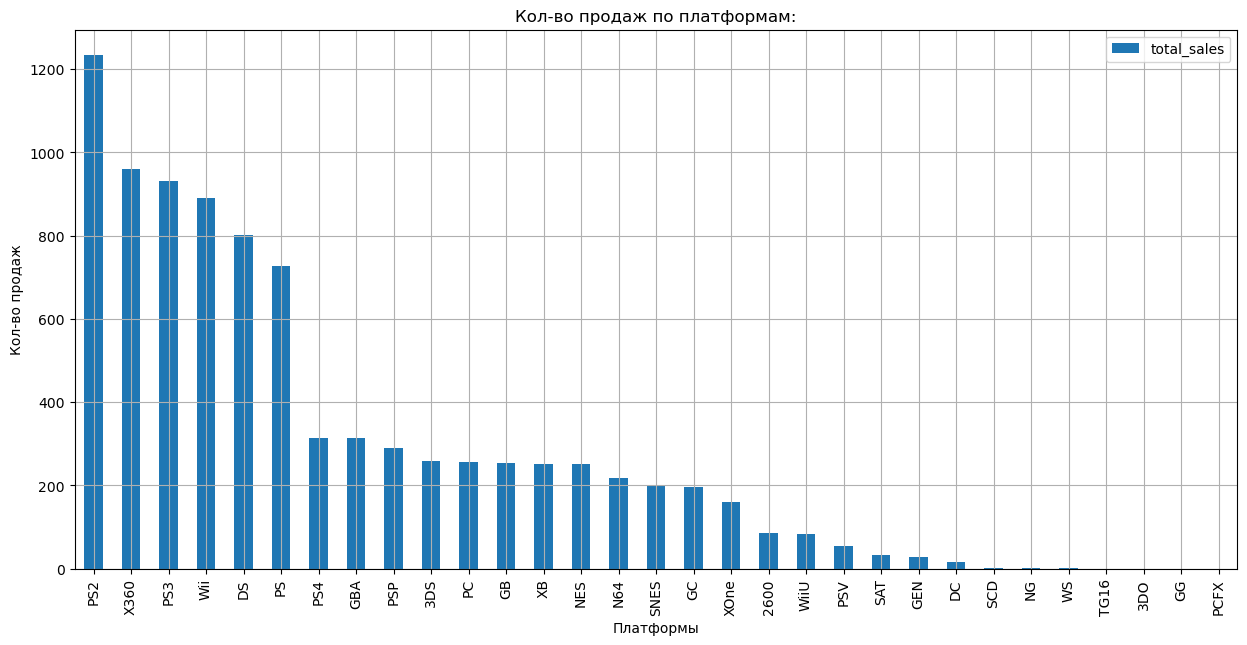

In [51]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar', style='o-', grid=True, figsize=(15, 7), title='Кол-во продаж по платформам:', xlabel='Платформы', ylabel='Кол-во продаж');

**Для дальнейшего анализа рассмотрим первую восьмерку платформ, с объемами продаж более 300 млн. копий.**

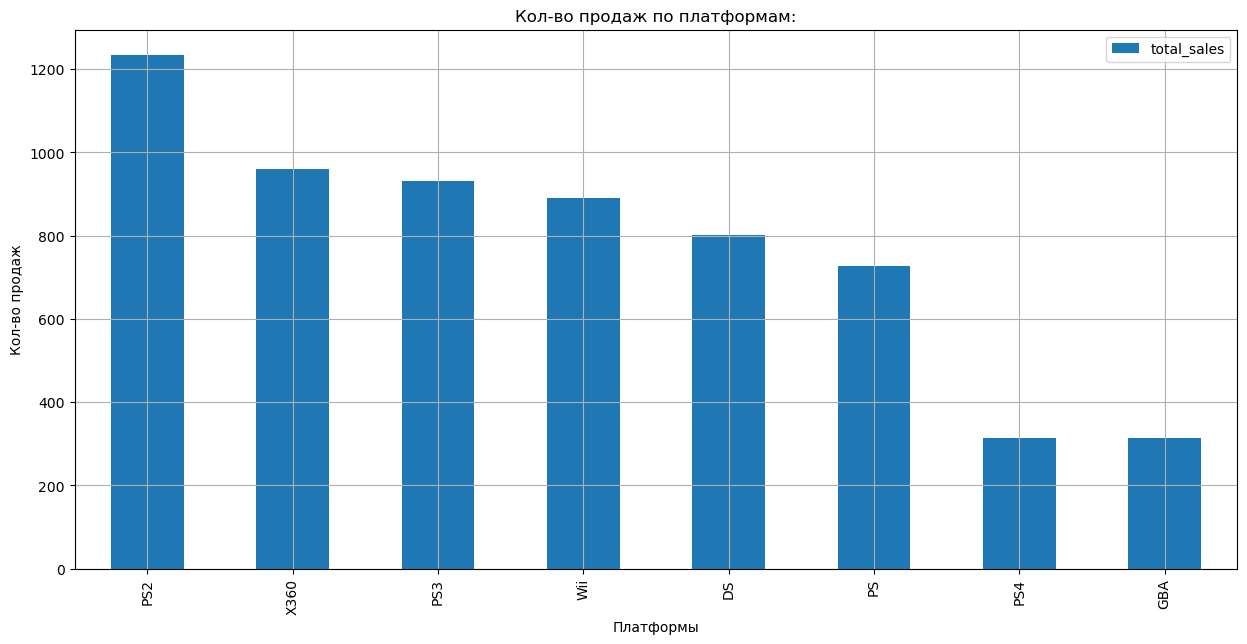

In [52]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(8).plot(kind='bar', grid=True, figsize=(15, 7), title='Кол-во продаж по платформам:', xlabel='Платформы', ylabel='Кол-во продаж');

In [53]:
platform_ps2 = data.loc[(data['platform'] == 'PS2')]
platform_x360 = data.loc[(data['platform'] == 'X360')]
platform_ps3 = data.loc[(data['platform'] == 'PS3')]
platform_wii = data.loc[(data['platform'] == 'Wii')]
platform_ds = data.loc[(data['platform'] == 'DS')]
platform_ps = data.loc[(data['platform'] == 'PS')]
platform_ps4 = data.loc[(data['platform'] == 'PS4')]
platform_gba = data.loc[(data['platform'] == 'GBA')]

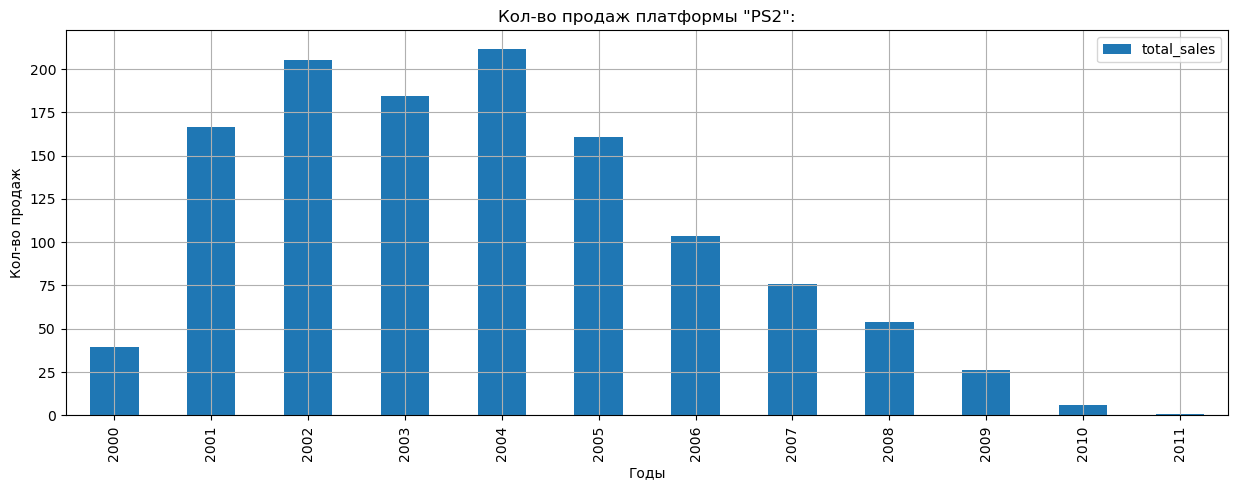

In [54]:
platform_ps2.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Кол-во продаж платформы "PS2":', xlabel='Годы', ylabel='Кол-во продаж');

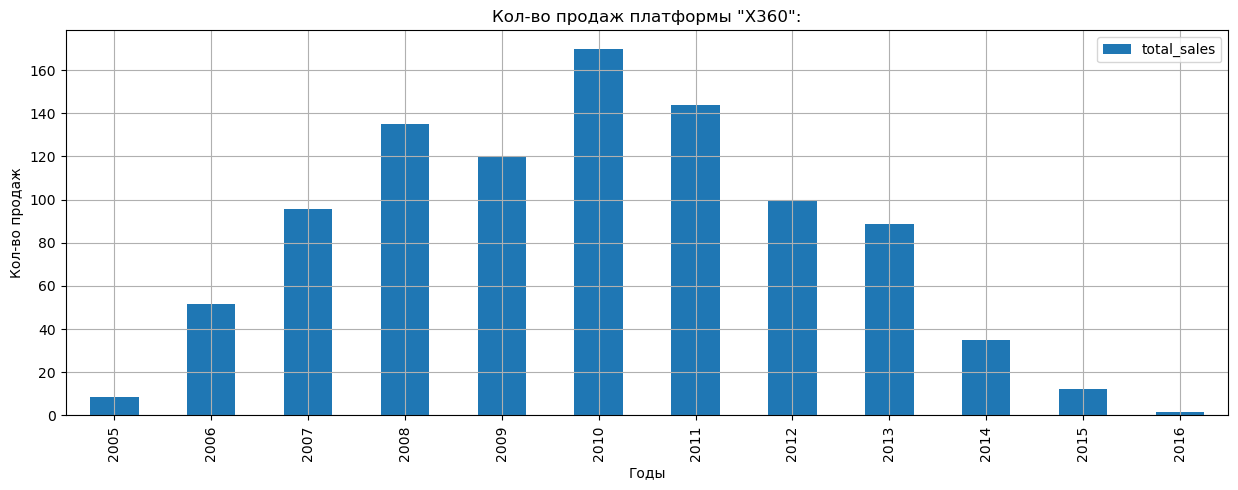

In [55]:
platform_x360.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Кол-во продаж платформы "X360":', xlabel='Годы', ylabel='Кол-во продаж');

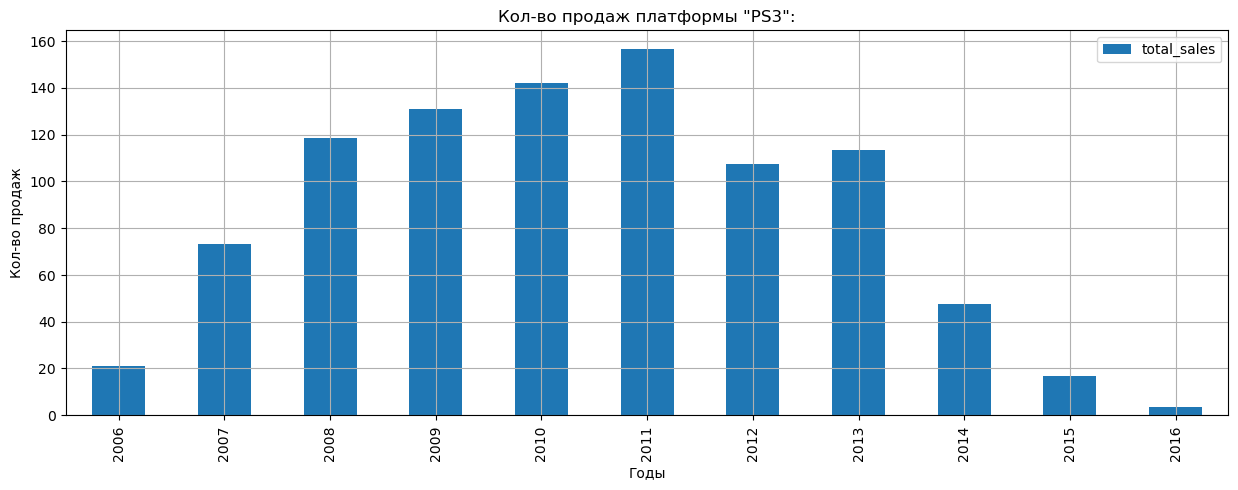

In [56]:
platform_ps3.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Кол-во продаж платформы "PS3":', xlabel='Годы', ylabel='Кол-во продаж');

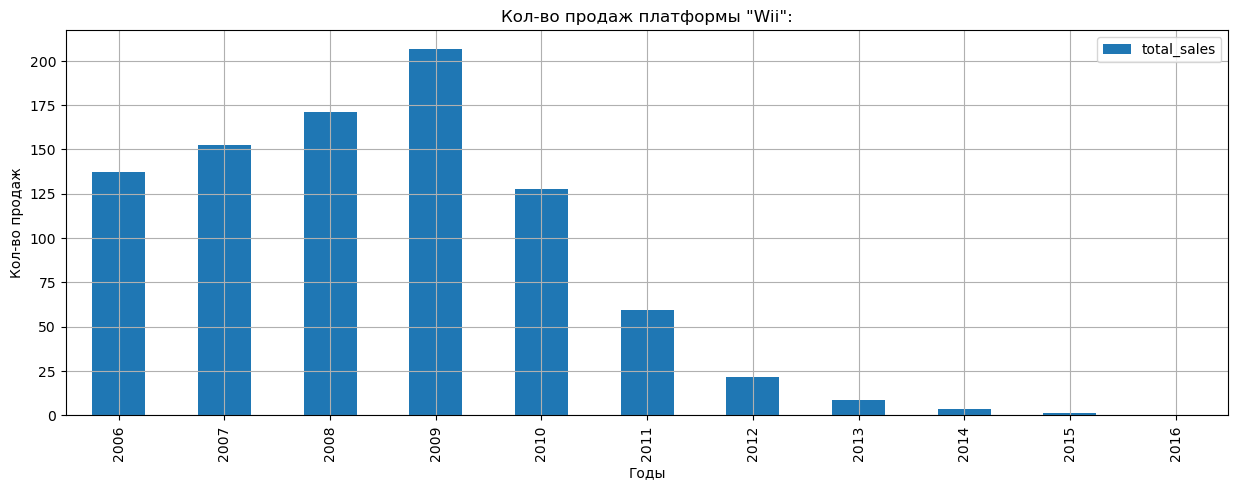

In [57]:
platform_wii.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Кол-во продаж платформы "Wii":', xlabel='Годы', ylabel='Кол-во продаж');

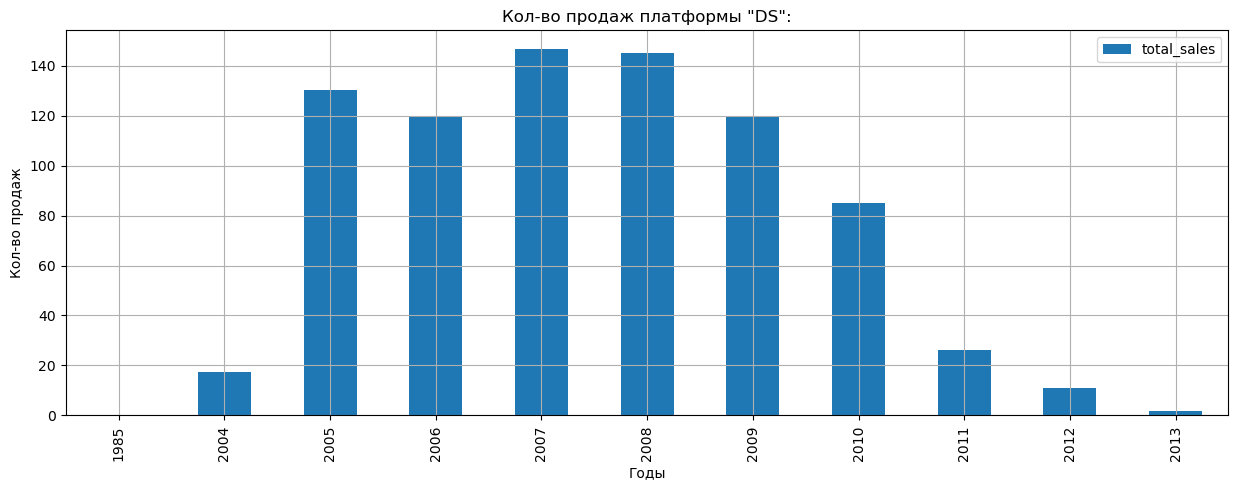

In [58]:
platform_ds.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Кол-во продаж платформы "DS":', xlabel='Годы', ylabel='Кол-во продаж');

На графике найдено "аномальное" значение, относящееся к 1985 году. DS (полное название: Nintendo DS) - следующее поколение карманных игровых консолей после Game Boy Advance SP. Консоль **выпущена в 2004 году** в Канаде, США и Японии.

Исключим из анализа "аномальные значения":

In [59]:
platform_ds = platform_ds.loc[(platform_ds['year_of_release'] >= 2004)]

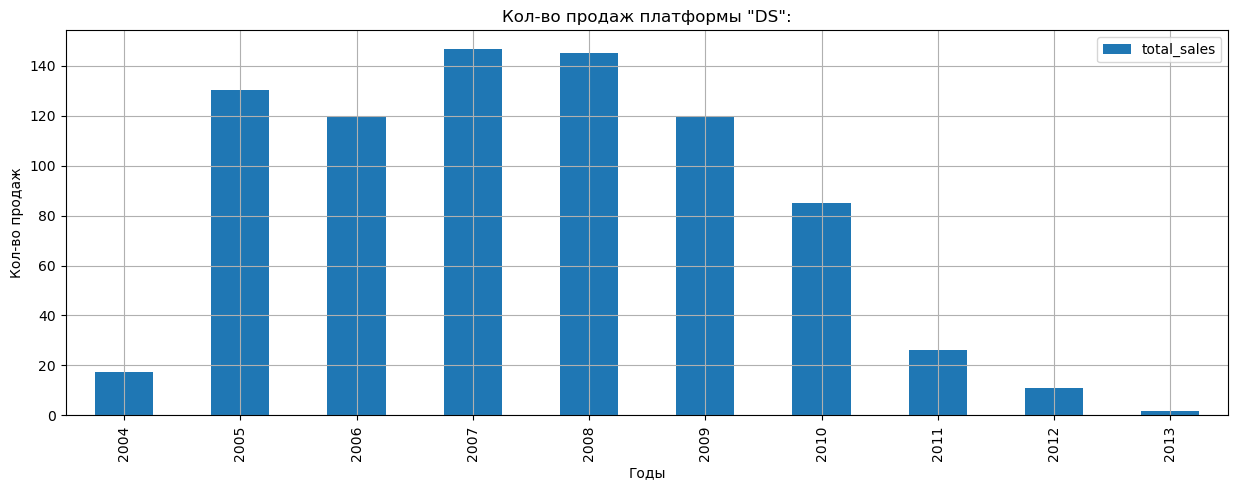

In [60]:
platform_ds.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Кол-во продаж платформы "DS":', xlabel='Годы', ylabel='Кол-во продаж');

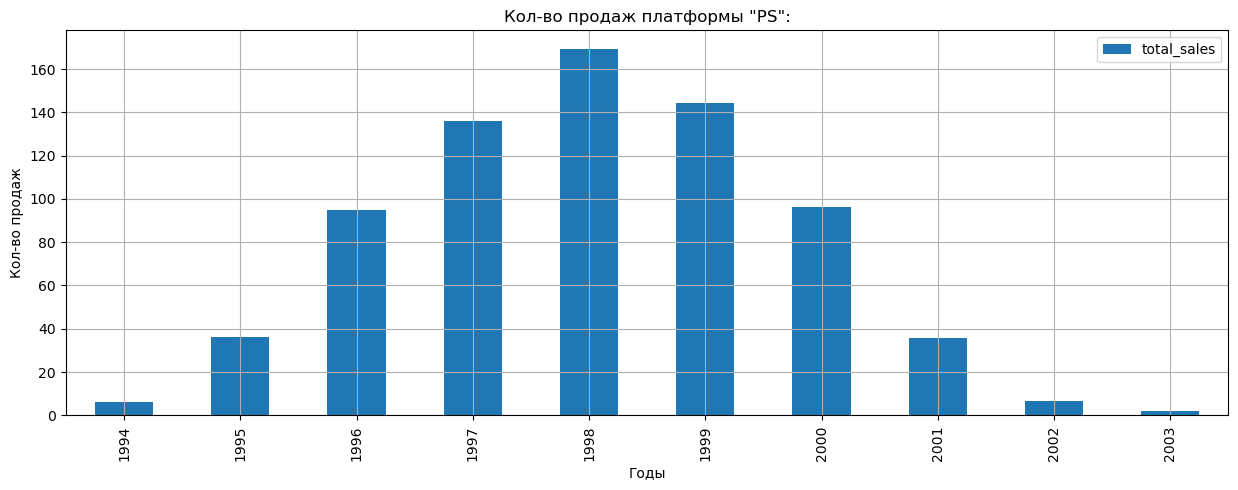

In [61]:
platform_ps.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', style='o-', grid=True, figsize=(15, 5), title='Кол-во продаж платформы "PS":', xlabel='Годы', ylabel='Кол-во продаж');

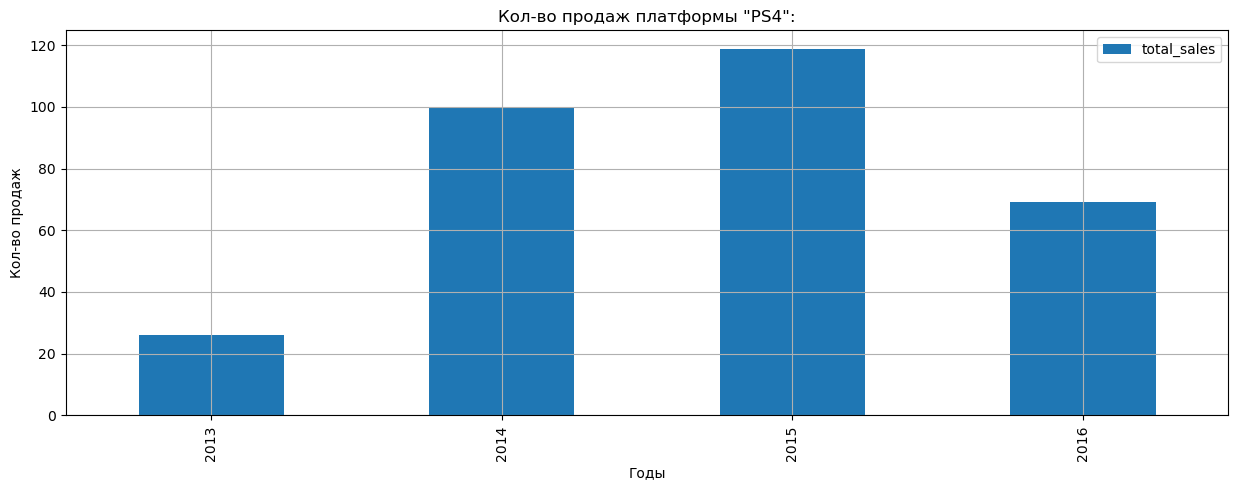

In [62]:
platform_ps4.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Кол-во продаж платформы "PS4":', xlabel='Годы', ylabel='Кол-во продаж');

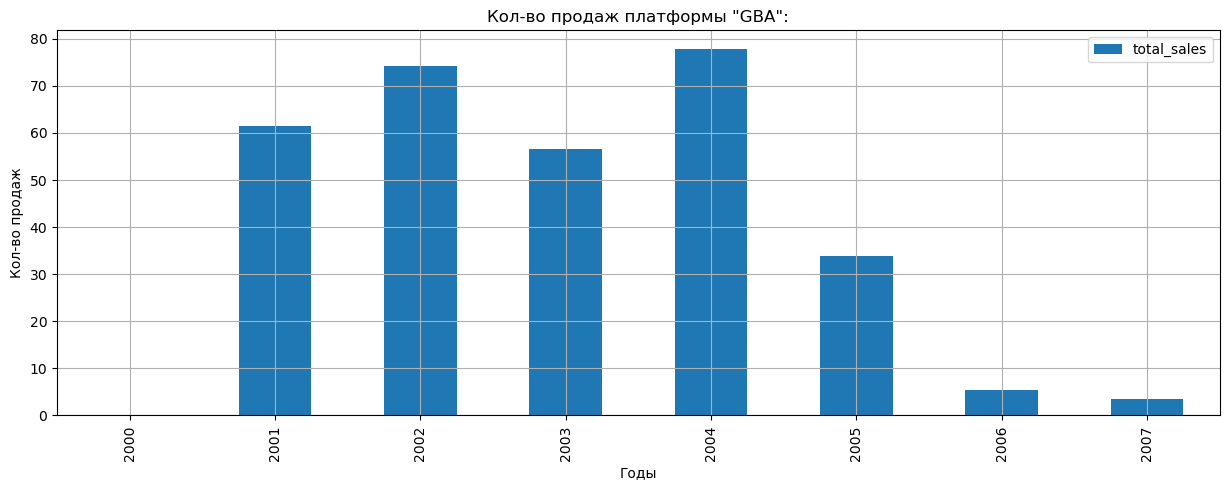

In [63]:
platform_gba.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Кол-во продаж платформы "GBA":', xlabel='Годы', ylabel='Кол-во продаж');

По результатам проведенного анализа видно, что многие платформы из "лидеров продаж" были популярны ранее, а к концу анализируемого периода или ушли с рынка вовсе, или продавались минимальным количеством:
- **'PS2'** - пик популярности пришелся на 2002-2004 годы, далее спад продаж, и после 2011 года продажи отсутствуют;
- **'X360'** - пик популярности пришелся на 2010-2011 годы, далее спад продаж, и к 2016 году продажи минимальны и исчисляются единицами копий;
- **'PS3'** - как и в случае с 'x360', пик популярности пришелся на 2010-2011 годы, далее спад продаж, и к 2016 году продажи минимальны и исчисляются единицами копий;
- **'Wii'** - пик популярности пришелся на 2009 год, далее спад продаж, и с 2013 года продажи минимальны и исчисляются единицами копий;
- **'DS'** - пик популярности пришелся на 2007-2008 годы, далее спад продаж, и после 2013 года продажи отсутствуют;
- **'PS'** - пик популярности пришелся на 1998-1999 годы, далее спад продаж, и после 2003 года продажи отсутствуют;
- **'PS4'** - пик популярности пришелся на 2015 год, в 2016 году продажи упали на 35-45%, при этом платформа сохраняет свою актуальность;
- **'GBA'** - пик популярности пришелся на 2004 год, далее спад продаж, и после 2007 года продажи отсутствуют.

Среди "лидеров рынка" жизненный цикл платформы составляет от 4 до 8 лет, если и сохраняется дольше, то за счет незначительного количества "преданных фанатов".

**Посмотрим жизненные циклы (количество лет существования на рынке игровой индустрии) всех платформ:**

In [64]:
print('Количество лет существования платформы:', data.loc[:,['year_of_release', 'platform']].drop_duplicates().pivot_table(index=['platform'], values='year_of_release', aggfunc='count').sort_values(by='year_of_release', ascending=False))
print()
print('Среднее арифметическое количество лет существования платформы:', data.loc[:,['year_of_release', 'platform']].drop_duplicates().pivot_table(index=['platform'], values='year_of_release', aggfunc='count').sort_values(by='year_of_release', ascending=False).mean())

Количество лет существования платформы:           year_of_release
platform                 
PC                     26
GB                     13
NES                    12
X360                   12
PSP                    12
PS2                    12
Wii                    11
DS                     11
PS3                    11
2600                   10
SNES                   10
PS                     10
XB                      9
GBA                     8
DC                      7
GC                      7
N64                     7
SAT                     6
3DS                     6
PSV                     6
WiiU                    5
GEN                     5
NG                      4
PS4                     4
XOne                    4
WS                      3
SCD                     2
3DO                     2
TG16                    1
GG                      1
PCFX                    1

Среднее арифметическое количество лет существования платформы: year_of_release    7.677419
dtype: flo

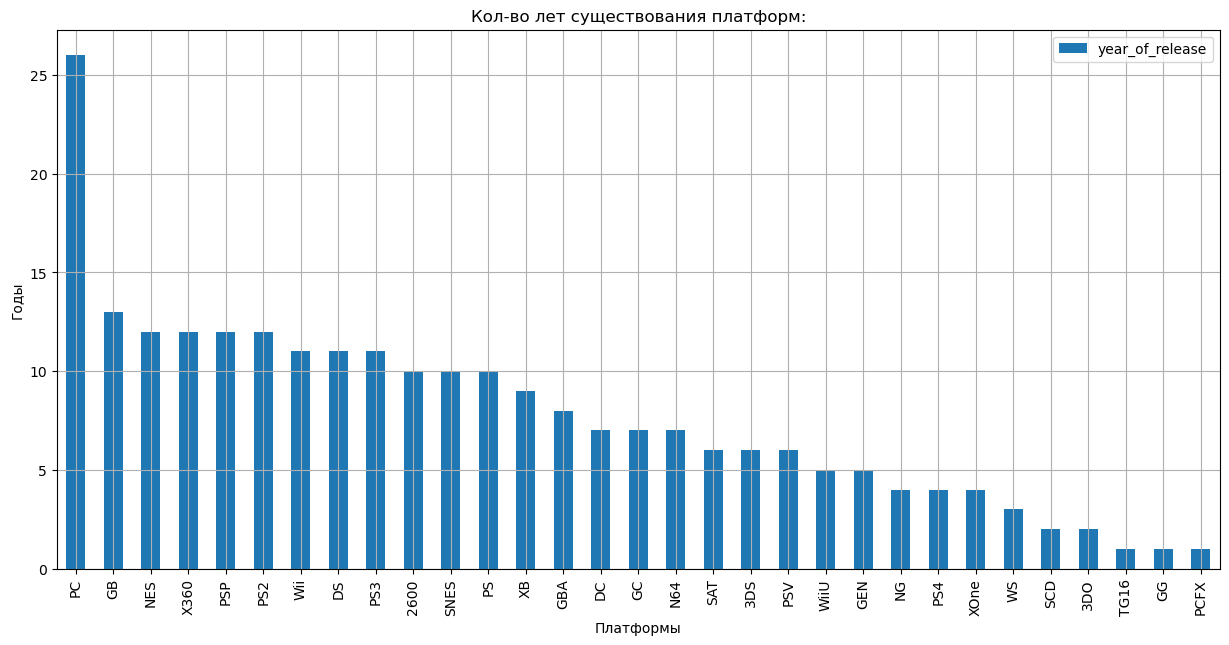

In [65]:
data.loc[:,['year_of_release', 'platform']].drop_duplicates().pivot_table(index=['platform'], values='year_of_release', aggfunc='count').sort_values(by='year_of_release', ascending=False).plot(kind='bar', grid=True, figsize=(15, 7), title='Кол-во лет существования платформ:', xlabel='Платформы', ylabel='Годы');

Таким образом, среднее арифметическое количество лет жизненного цикла платформы составляет 7 лет, естественно, каждую платформу необходимо рассматривать индивидуально, т.к. её популярность зависит от множества факторов.

### **Определение актуального периода исследования, с целью построения прогноза на 2017 год:**

С целью построения прогноза на 2017 год целесообразно определить актуальный период исследования - 2014-2016 годы. Выбор этого периода позволит исключить устаревшие данные, убрать из анализа ушедшие с рынка платформы и т.д.  
Кроме того, в эти годы рынок уже проходит трансформацию в сторону уменьшения количества выпуска игр за счет увеличения их качества.

### **Исключение из работы данных за предыдущие (неактуальные) периоды:**

In [66]:
data_actual_period = data.loc[data['year_of_release'] >= 2014]
display(data_actual_period.head(5))
print()
print('Годы, за которые проводится исследование:', data_actual_period['year_of_release'].unique())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_edit,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,not_in_esrb,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,NaN,not_in_esrb,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,NaN,not_in_esrb,7.98



Годы, за которые проводится исследование: <IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64


### **Установление лидеров среди платформ по числу продаж, определение их цикла (рост/падение):**

In [67]:
print(data_actual_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False))

          total_sales
platform             
PS4            288.15
XOne           140.36
3DS             86.68
PS3             68.18
X360            48.22
WiiU            42.98
PC              27.05
PSV             22.40
Wii              5.07
PSP              0.36


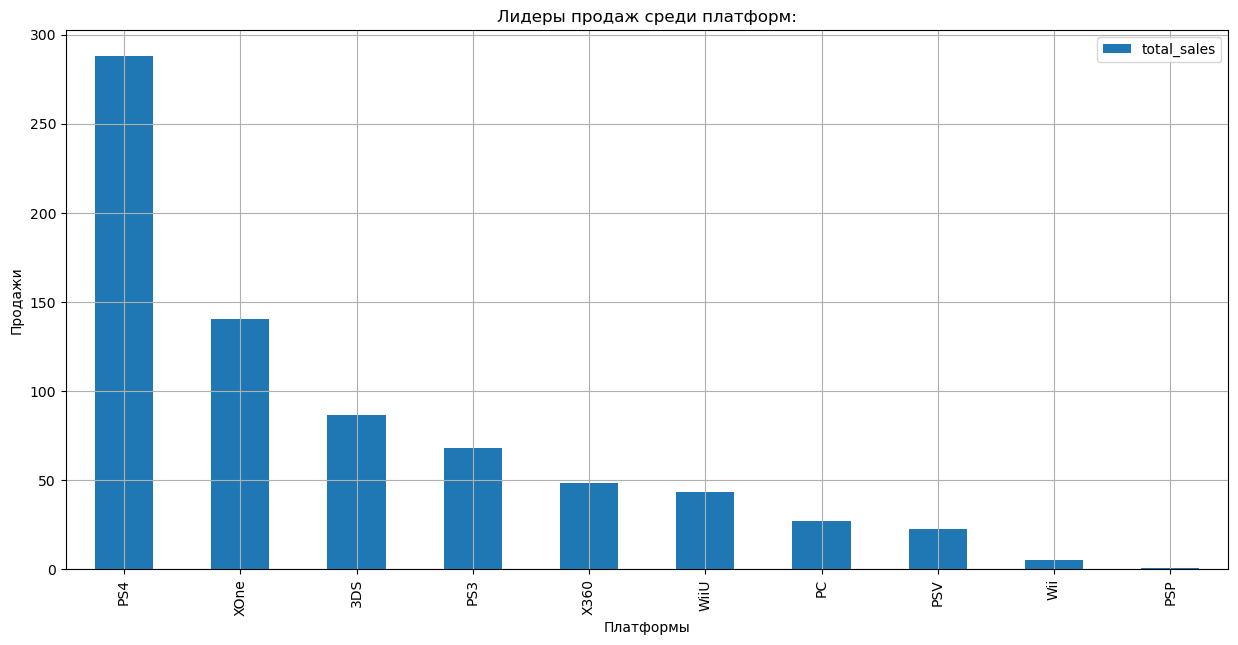

In [68]:
data_actual_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar', style='o-', grid=True, figsize=(15, 7), title='Лидеры продаж среди платформ:', xlabel='Платформы', ylabel='Продажи');

При анализе данных за актуальный период (2014-2016гг.) установлены лидеры продаж среди следующих платформ:
- **'PS4'** - более 288 млн. копий,
- **'XOne'** - более 140 млн. копий,
- **'3DS'** - более 86 млн. копий.

**Определение жизненного цикла лидирующих платформ:**

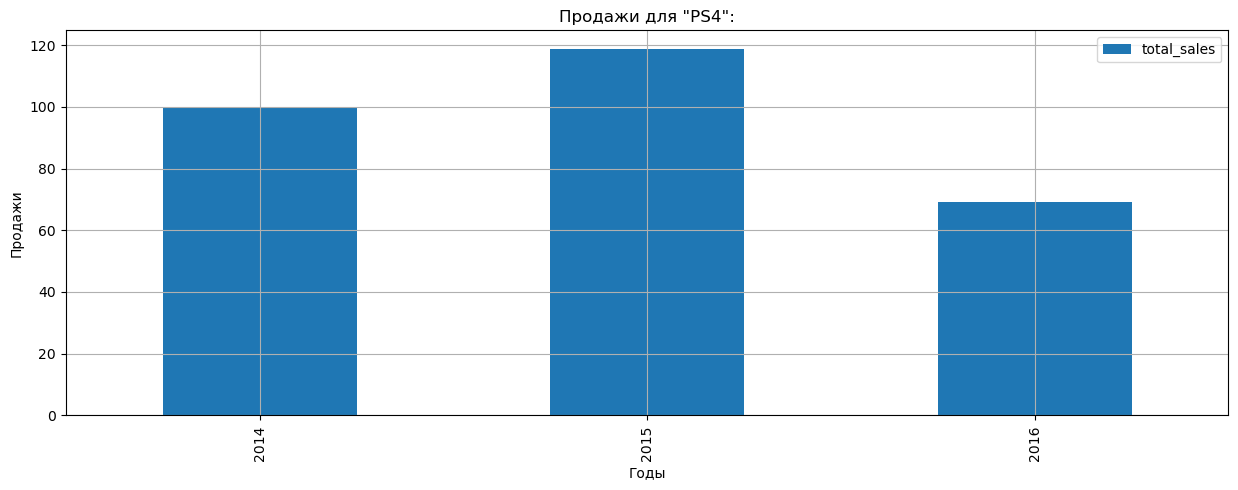

In [69]:
data_actual_period.loc[(data['platform'] == 'PS4')].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Продажи для "PS4":', xlabel='Годы', ylabel='Продажи');

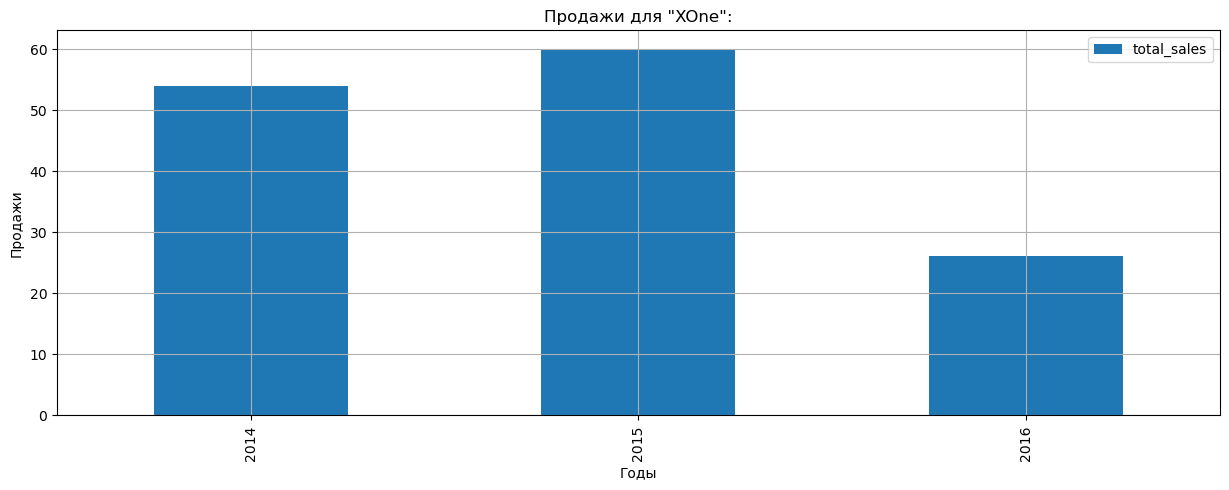

In [70]:
data_actual_period.loc[(data['platform'] == 'XOne')].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Продажи для "XOne":', xlabel='Годы', ylabel='Продажи');

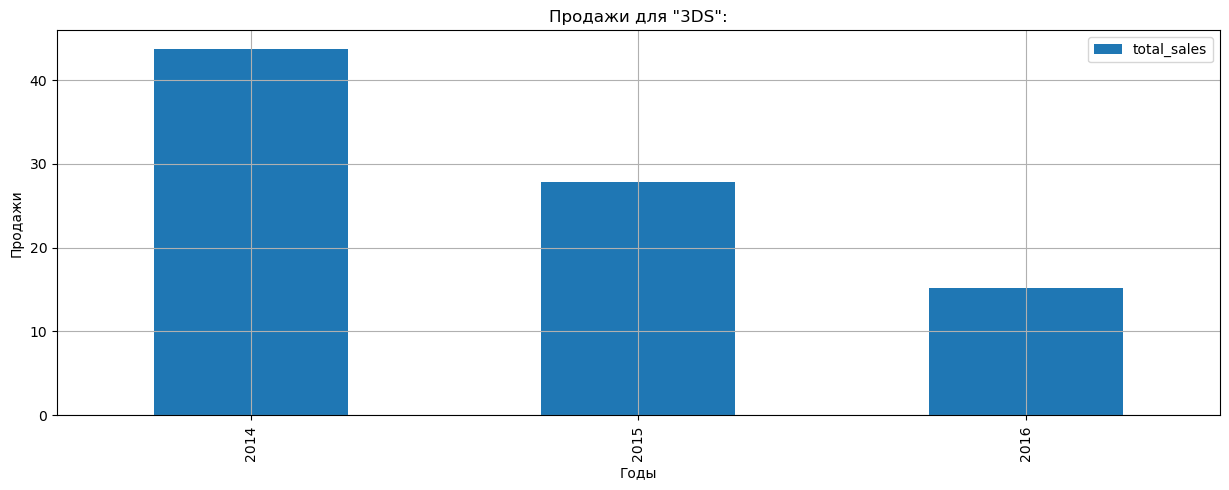

In [71]:
data_actual_period.loc[(data['platform'] == '3DS')].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 5), title='Продажи для "3DS":', xlabel='Годы', ylabel='Продажи');

По графикам видно, что 2016 год оказался минимальным по количеству продаж для лидирующих платформ. При этом для 'PS4' и 'XOne' 2015 год охарактеризовался пиком уровней продаж, в то время, как у '3DS' с 2014 года наблюдается стагнация в уровнях продаж.

Лидерами продаж и будущими потенциально прибыльными платформами однозначно являются 'PS4' и 'XOne' (или их "преемники, как в случае с 'PS4' по отношению к 'PS3').

**Построим диаграмму размаха и посмотрим на количество продаж по платформам:**

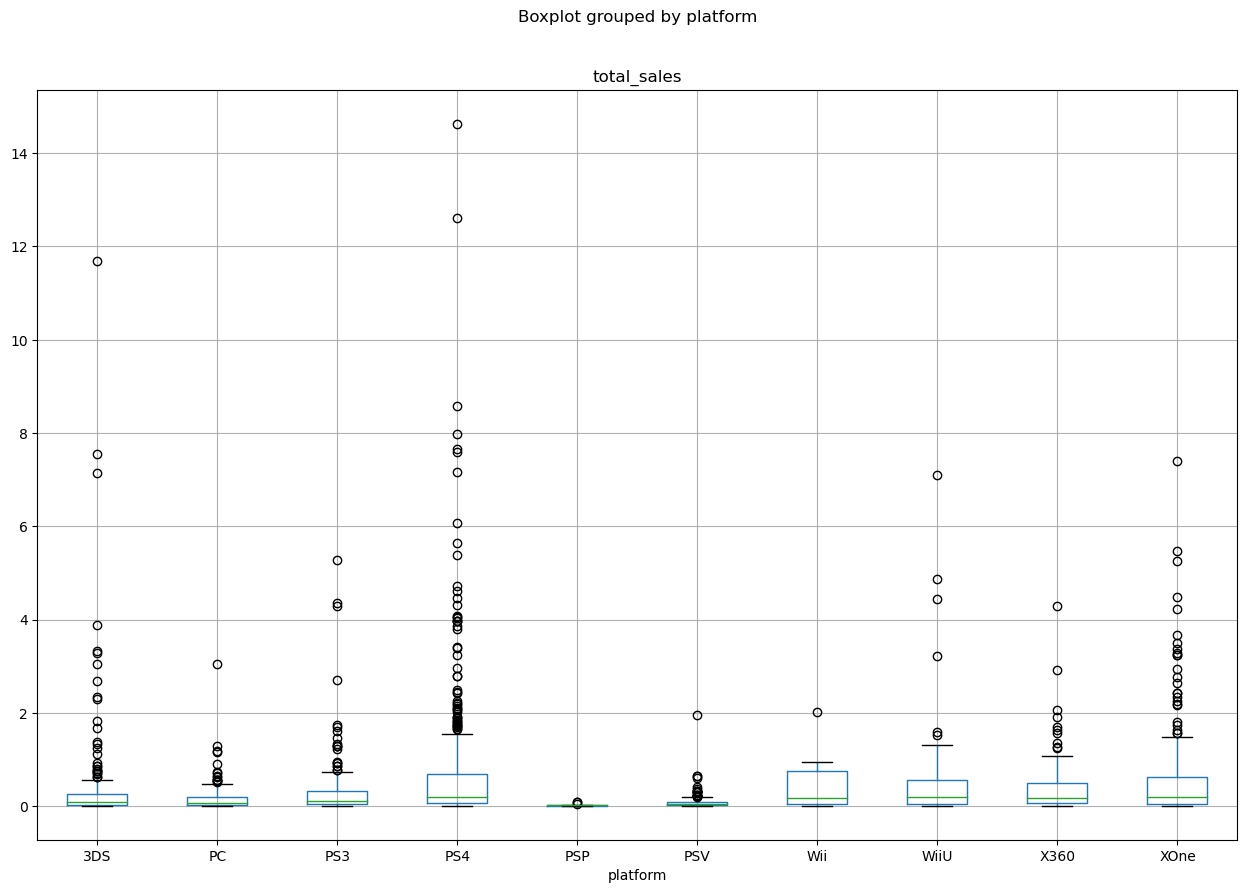

In [72]:
data_actual_period.boxplot(column='total_sales', by='platform', figsize=(15,10));

**По диаграмме размаха ("ящик с усами") видно, что есть значительные "выбросы данных" - так называемые "аномальные значения". Однако, в данном исследовании эти "аномальные значения" являются реальными (не ошибочными), т.к. существует по несколько примеров игр, ставших безоговорочными лидерами продаж - хитами.  
Построим диаграмму размаха, исключив "аномальные значения":**

(0.0, 5.0)

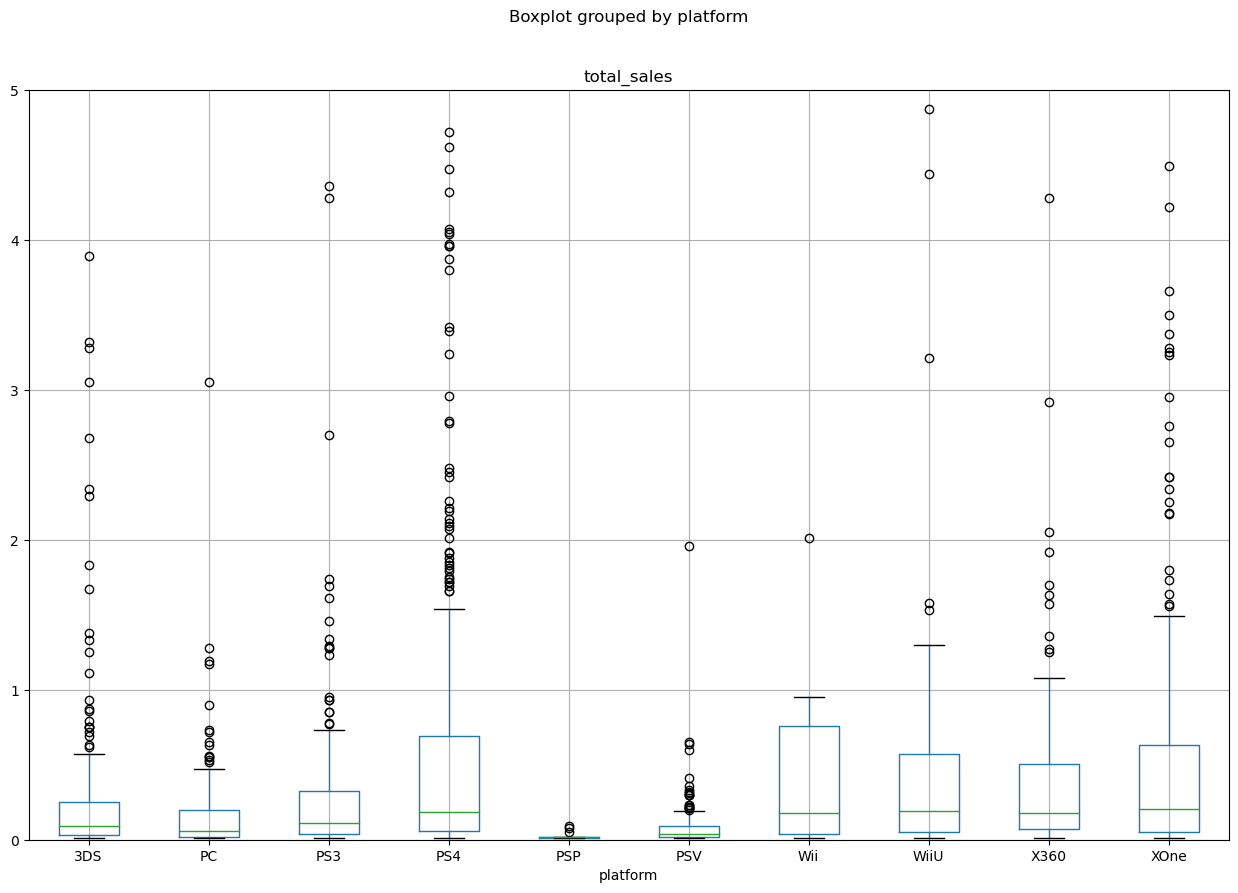

In [73]:
data_actual_period.boxplot(column='total_sales', by='platform', figsize=(15,10));
plt.ylim(0, 5)

In [74]:
display(data_actual_period.groupby('platform')['total_sales'].describe())

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


При подобных данных, с целью "усреднения" количества продаж среди лидирущих платформ, следует обращаться к медианному значению:
- 0,090 - для '3DS',
- 0.060 - для 'PC',
- 0,110 - для 'PS3',
- 0,185 - для 'PS4' и т.д.,  

а не к среднему арифметическому.

### **Определение зависимости продаж внутри каждой платформы от оценок и отзывов пользователей и критиков:**

*Необходимо помнить, что в категорию оценки '-1', помещены данные об играх, у которых в строках с рейтингами были пропуски значений ('NaN') и не установленные значения ('tbd'), эти данные при построении графиков будут отфильтрованы.*

#### **Определение зависимости от оценок и отзывов критиков:**

**Платформа '3DS' - Построение диаграммы рассеяния и определение корреляции:**

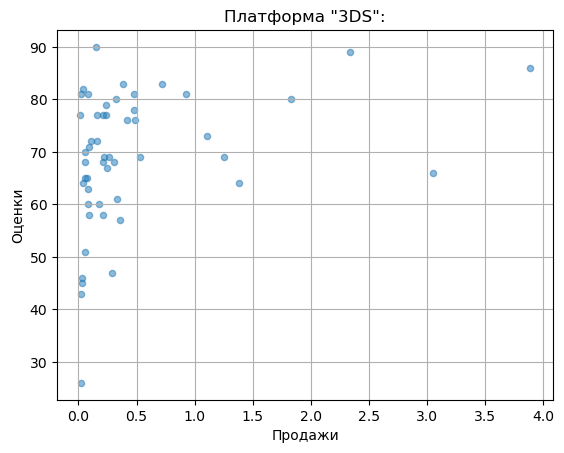

In [75]:
data_actual_period[(data_actual_period['platform'] == '3DS') & (data_actual_period['critic_score'] >= 0)].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "3DS":', xlabel='Продажи', ylabel='Оценки');

In [76]:
print(data_actual_period[(data_actual_period['platform'] == '3DS') & (data_actual_period['critic_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == '3DS') & (data_actual_period['critic_score'] >= 0)]['critic_score']))

0.31411749286905094


**Платформа 'PC' - Построение диаграммы рассеяния и определение корреляции:**

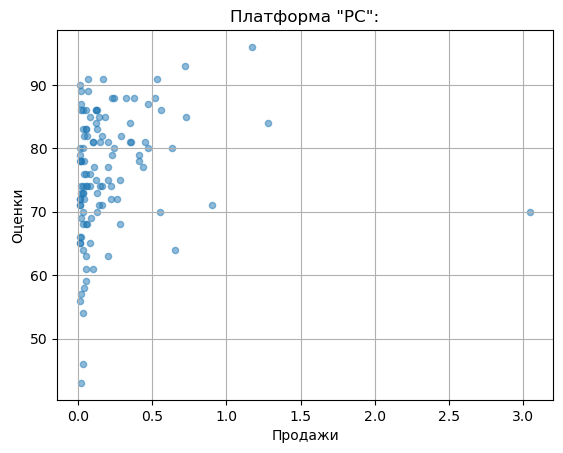

In [77]:
data_actual_period[(data_actual_period['platform'] == 'PC') & (data_actual_period['critic_score'] >= 0)].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "PC":', xlabel='Продажи', ylabel='Оценки');

In [78]:
print(data_actual_period[(data_actual_period['platform'] == 'PC') & (data_actual_period['critic_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'PC') & (data_actual_period['critic_score'] >= 0)]['critic_score']))

0.17463413769350025


**Платформа 'PS3' - Построение диаграммы рассеяния и определение корреляции:**

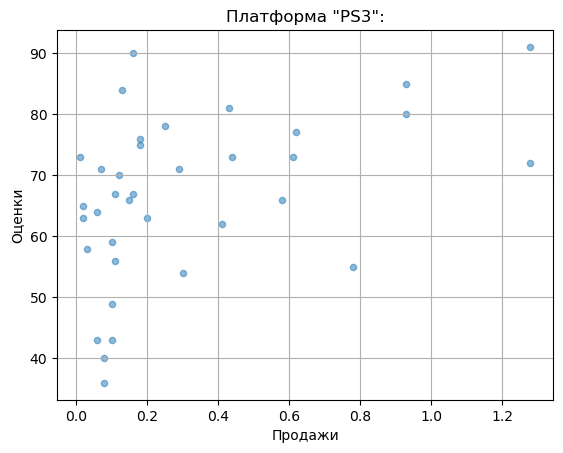

In [79]:
data_actual_period[(data_actual_period['platform'] == 'PS3') & (data_actual_period['critic_score'] >= 0)].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "PS3":', xlabel='Продажи', ylabel='Оценки');

In [80]:
print(data_actual_period[(data_actual_period['platform'] == 'PS3') & (data_actual_period['critic_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'PS3') & (data_actual_period['critic_score'] >= 0)]['critic_score']))

0.44657460493190715


**Платформа 'PS4' - Построение диаграммы рассеяния и определение корреляции:**

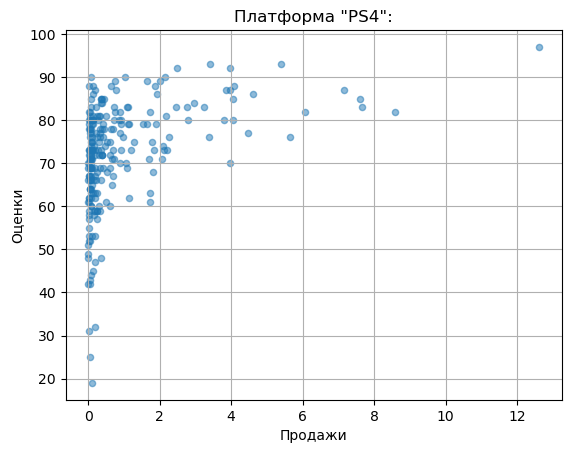

In [81]:
data_actual_period[(data_actual_period['platform'] == 'PS4') & (data_actual_period['critic_score'] >= 0)].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "PS4":', xlabel='Продажи', ylabel='Оценки');

In [82]:
print(data_actual_period[(data_actual_period['platform'] == 'PS4') & (data_actual_period['critic_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'PS4') & (data_actual_period['critic_score'] >= 0)]['critic_score']))

0.402661410681041


**Платформа 'PSP' - Построение диаграммы рассеяния и определение корреляции:**

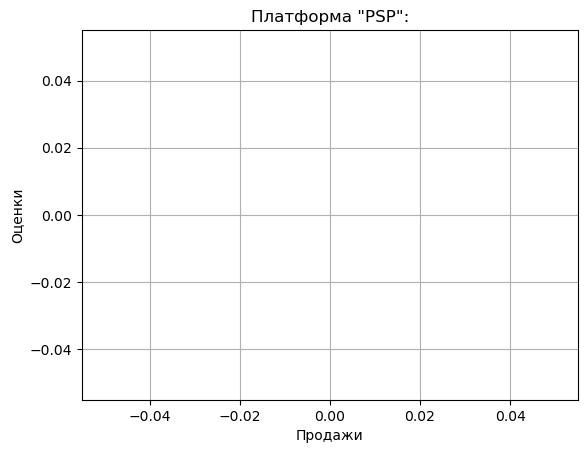

In [83]:
data_actual_period[(data_actual_period['platform'] == 'PSP') & (data_actual_period['critic_score'] >= 0)].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "PSP":', xlabel='Продажи', ylabel='Оценки');

In [84]:
print(data_actual_period[(data_actual_period['platform'] == 'PSP') & (data_actual_period['critic_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'PSP') & (data_actual_period['critic_score'] >= 0)]['critic_score']))

nan


**Платформа 'PSV' - Построение диаграммы рассеяния и определение корреляции:**

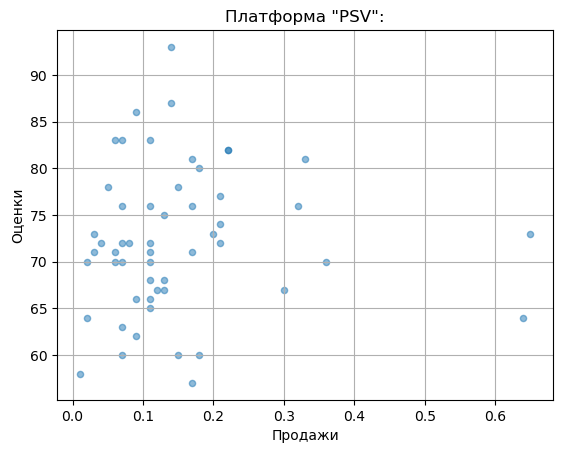

In [85]:
data_actual_period[(data_actual_period['platform'] == 'PSV') & (data_actual_period['critic_score'] >= 0)].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "PSV":', xlabel='Продажи', ylabel='Оценки');

In [86]:
print(data_actual_period[(data_actual_period['platform'] == 'PSV') & (data_actual_period['critic_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'PSV') & (data_actual_period['critic_score'] >= 0)]['critic_score']))

0.04266490657009527


**Платформа 'Wii' - Построение диаграммы рассеяния и определение корреляции:**

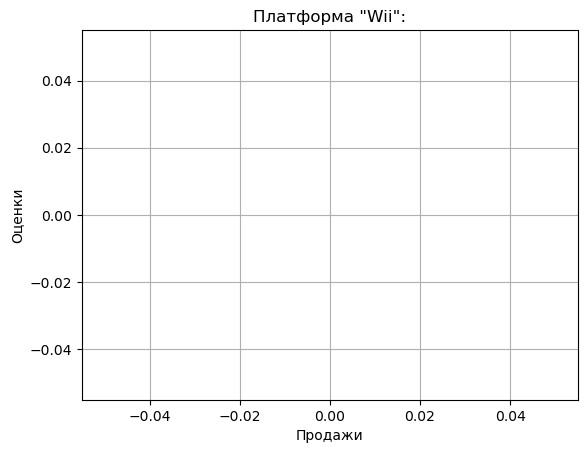

In [87]:
data_actual_period[(data_actual_period['platform'] == 'Wii') & (data_actual_period['critic_score'] >= 0)].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "Wii":', xlabel='Продажи', ylabel='Оценки');

In [88]:
print(data_actual_period[(data_actual_period['platform'] == 'Wii') & (data_actual_period['critic_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'Wii') & (data_actual_period['critic_score'] >= 0)]['critic_score']))

nan


**Платформа 'WiiU' - Построение диаграммы рассеяния и определение корреляции:**

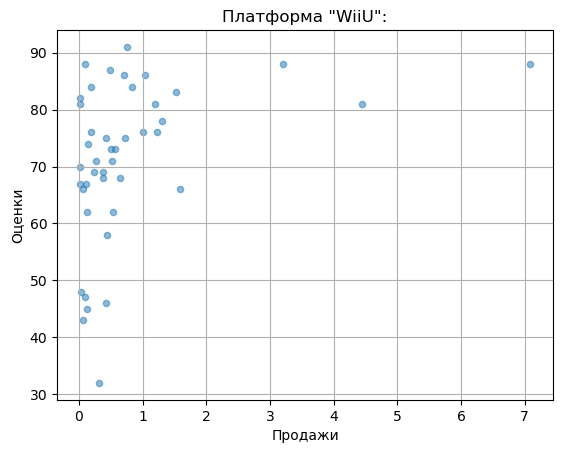

In [89]:
data_actual_period[(data_actual_period['platform'] == 'WiiU') & (data_actual_period['critic_score'] >= 0)].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "WiiU":', xlabel='Продажи', ylabel='Оценки');

In [90]:
print(data_actual_period[(data_actual_period['platform'] == 'WiiU') & (data_actual_period['critic_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'WiiU') & (data_actual_period['critic_score'] >= 0)]['critic_score']))

0.37020141248088406


**Платформа 'X360' - Построение диаграммы рассеяния и определение корреляции:**

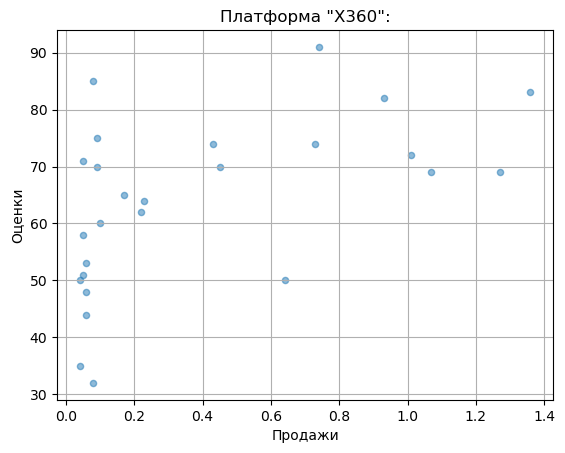

In [91]:
data_actual_period[(data_actual_period['platform'] == 'X360') & (data_actual_period['critic_score'] >= 0)].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "X360":', xlabel='Продажи', ylabel='Оценки');

In [92]:
print(data_actual_period[(data_actual_period['platform'] == 'X360') & (data_actual_period['critic_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'X360') & (data_actual_period['critic_score'] >= 0)]['critic_score']))

0.5257228356581521


**Платформа 'XOne' - Построение диаграммы рассеяния и определение корреляции:**

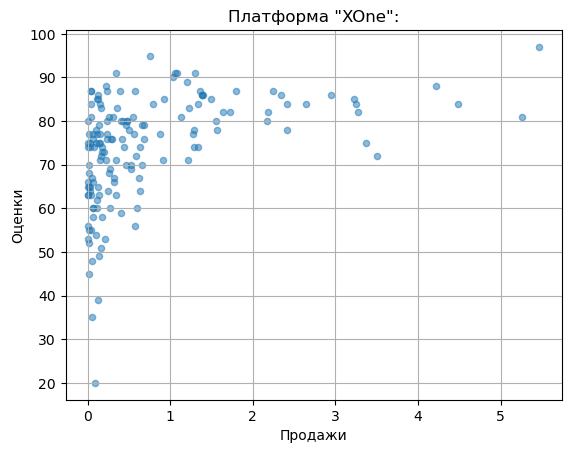

In [93]:
data_actual_period[(data_actual_period['platform'] == 'XOne') & (data_actual_period['critic_score'] >= 0)].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "XOne":', xlabel='Продажи', ylabel='Оценки');

In [94]:
print(data_actual_period[(data_actual_period['platform'] == 'XOne') & (data_actual_period['critic_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'XOne') & (data_actual_period['critic_score'] >= 0)]['critic_score']))

0.428676943703332


Для платформ PSP и Wii в актуальном периоде отсутствуют оценки критиков, в связи с чем, построение диаграмм рассеяния и определение корреляции невозможно.

**Посмотрим зависимость от оценок критиков по всем платформам:**

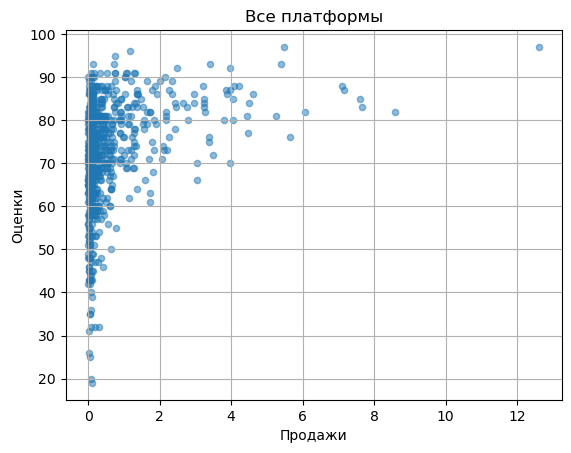

In [95]:
data_actual_period[data_actual_period['critic_score'] >= 0].plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5, title='Все платформы', xlabel='Продажи', ylabel='Оценки');

In [96]:
print(data_actual_period[data_actual_period['critic_score'] >= 0]['total_sales'].corr(data_actual_period[data_actual_period['critic_score'] >= 0]['user_score']))

0.04374984602889705


#### **Определение зависимости от оценок и отзывов пользователей:**

**Платформа '3DS' - Построение диаграммы рассеяния и определение корреляции:**

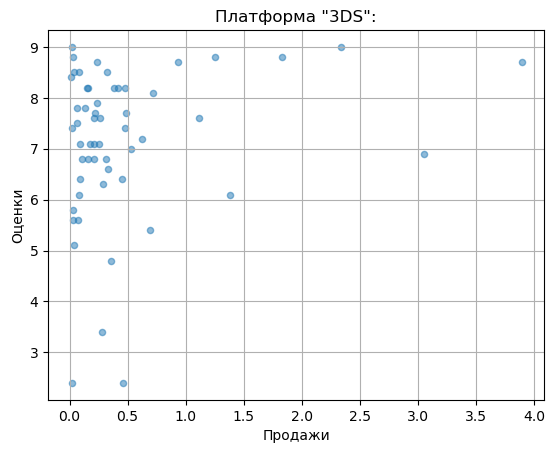

In [97]:
data_actual_period[(data_actual_period['platform'] == '3DS') & (data_actual_period['user_score'] >= 0)].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "3DS":', xlabel='Продажи', ylabel='Оценки');

In [98]:
print(data_actual_period[(data_actual_period['platform'] == '3DS') & (data_actual_period['user_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == '3DS') & (data_actual_period['user_score'] >= 0)]['user_score']))

0.2151932718527028


**Платформа 'PC' - Построение диаграммы рассеяния и определение корреляции:**

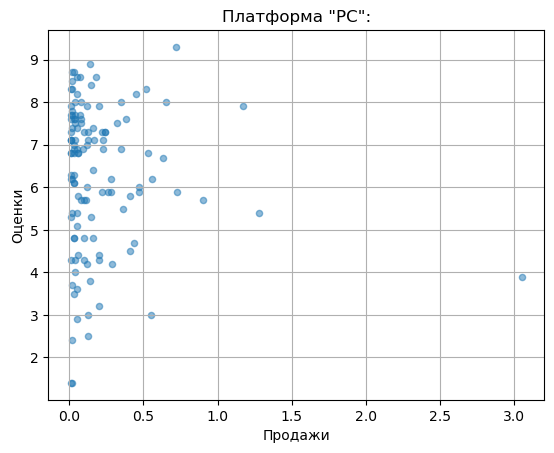

In [99]:
data_actual_period[(data_actual_period['platform'] == 'PC') & (data_actual_period['user_score'] >= 0)].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "PC":', xlabel='Продажи', ylabel='Оценки');

In [100]:
print(data_actual_period[(data_actual_period['platform'] == 'PC') & (data_actual_period['user_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'PC') & (data_actual_period['user_score'] >= 0)]['user_score']))

-0.07159665703472454


**Платформа 'PS3' - Построение диаграммы рассеяния и определение корреляции:**

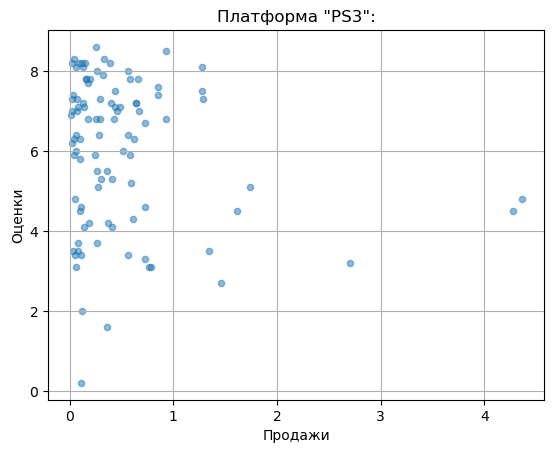

In [101]:
data_actual_period[(data_actual_period['platform'] == 'PS3') & (data_actual_period['user_score'] >= 0)].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "PS3":', xlabel='Продажи', ylabel='Оценки');

In [102]:
print(data_actual_period[(data_actual_period['platform'] == 'PS3') & (data_actual_period['user_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'PS3') & (data_actual_period['user_score'] >= 0)]['user_score']))

-0.16676141347662105


**Платформа 'PS4' - Построение диаграммы рассеяния и определение корреляции:**

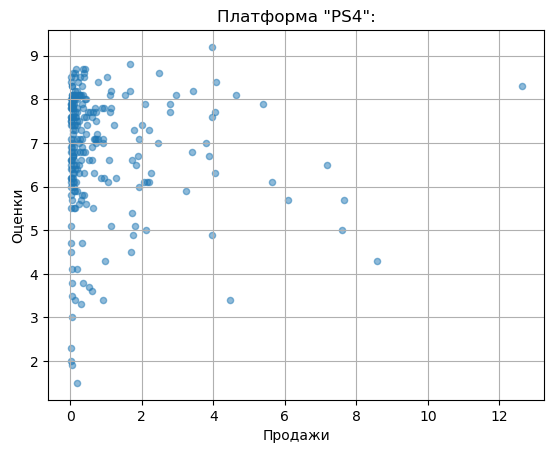

In [103]:
data_actual_period[(data_actual_period['platform'] == 'PS4') & (data_actual_period['user_score'] >= 0)].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "PS4":', xlabel='Продажи', ylabel='Оценки');

In [104]:
print(data_actual_period[(data_actual_period['platform'] == 'PS4') & (data_actual_period['user_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'PS4') & (data_actual_period['user_score'] >= 0)]['user_score']))

-0.040131589472697286


**Платформа 'PSP' - Построение диаграммы рассеяния и определение корреляции:**

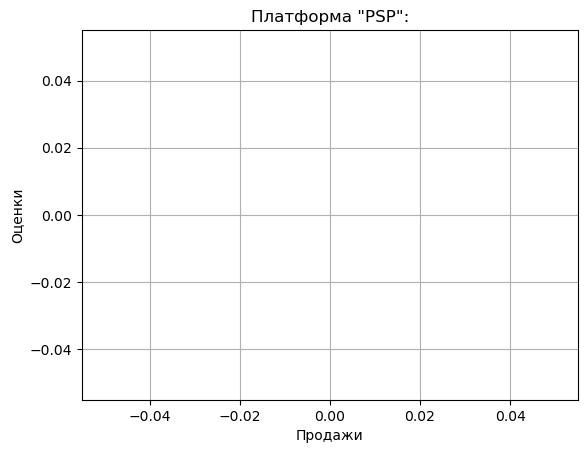

In [105]:
data_actual_period[(data_actual_period['platform'] == 'PSP') & (data_actual_period['user_score'] >= 0)].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "PSP":', xlabel='Продажи', ylabel='Оценки');

In [106]:
print(data_actual_period[(data_actual_period['platform'] == 'PSP') & (data_actual_period['user_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'PSP') & (data_actual_period['user_score'] >= 0)]['user_score']))

nan


**Платформа 'PSV' - Построение диаграммы рассеяния и определение корреляции:**

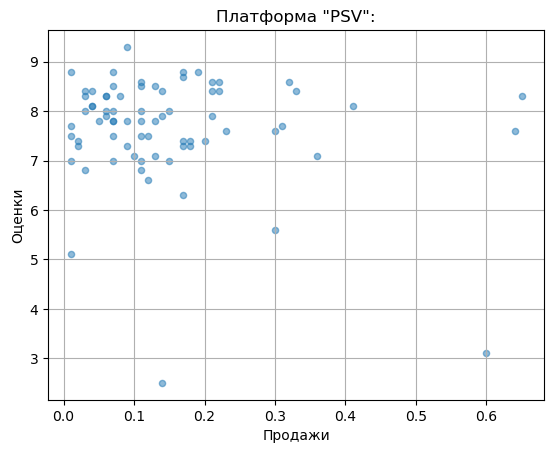

In [107]:
data_actual_period[(data_actual_period['platform'] == 'PSV') & (data_actual_period['user_score'] >= 0)].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "PSV":', xlabel='Продажи', ylabel='Оценки');

In [108]:
print(data_actual_period[(data_actual_period['platform'] == 'PSV') & (data_actual_period['user_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'PSV') & (data_actual_period['user_score'] >= 0)]['user_score']))

-0.16845504978064438


**Платформа 'Wii' - Построение диаграммы рассеяния и определение корреляции:**

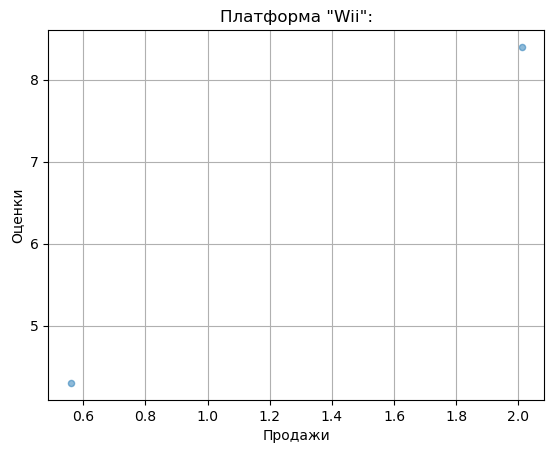

In [109]:
data_actual_period[(data_actual_period['platform'] == 'Wii') & (data_actual_period['user_score'] >= 0)].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "Wii":', xlabel='Продажи', ylabel='Оценки');

In [110]:
print(data_actual_period[(data_actual_period['platform'] == 'Wii') & (data_actual_period['user_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'Wii') & (data_actual_period['user_score'] >= 0)]['user_score']))

1.0


**Платформа 'WiiU' - Построение диаграммы рассеяния и определение корреляции:**

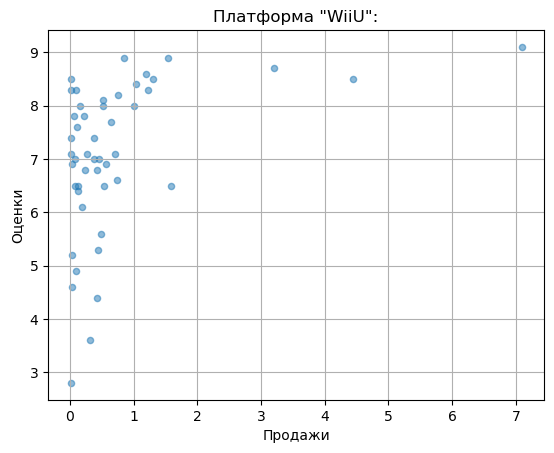

In [111]:
data_actual_period[(data_actual_period['platform'] == 'WiiU') & (data_actual_period['user_score'] >= 0)].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "WiiU":', xlabel='Продажи', ylabel='Оценки');

In [112]:
print(data_actual_period[(data_actual_period['platform'] == 'WiiU') & (data_actual_period['user_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'WiiU') & (data_actual_period['user_score'] >= 0)]['user_score']))

0.40792645792170784


**Платформа 'X360' - Построение диаграммы рассеяния и определение корреляции:**

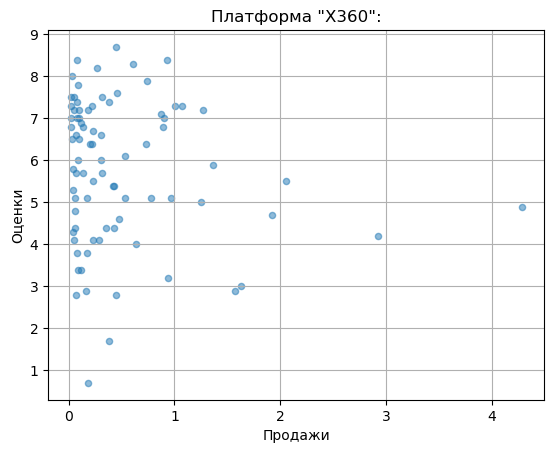

In [113]:
data_actual_period[(data_actual_period['platform'] == 'X360') & (data_actual_period['user_score'] >= 0)].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "X360":', xlabel='Продажи', ylabel='Оценки');

In [114]:
print(data_actual_period[(data_actual_period['platform'] == 'X360') & (data_actual_period['user_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'X360') & (data_actual_period['user_score'] >= 0)]['user_score']))

-0.13844457094566506


**Платформа 'XOne' - Построение диаграммы рассеяния и определение корреляции:**

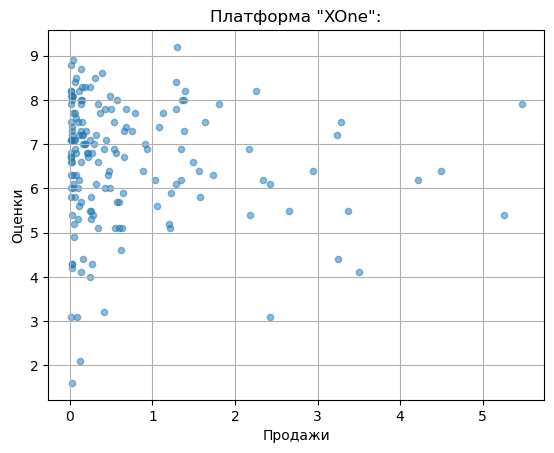

In [115]:
data_actual_period[(data_actual_period['platform'] == 'XOne') & (data_actual_period['user_score'] >= 0)].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, title='Платформа "XOne":', xlabel='Продажи', ylabel='Оценки');

In [116]:
print(data_actual_period[(data_actual_period['platform'] == 'XOne') & (data_actual_period['user_score'] >= 0)]['total_sales'].corr(data_actual_period[(data_actual_period['platform'] == 'XOne') & (data_actual_period['user_score'] >= 0)]['user_score']))

-0.07038392806475818


Для платформ PSP и Wii в актуальном периоде отсутствуют (либо слишком мало) оценки критиков, в связи с чем, построение диаграмм рассеяния и определение корреляции невозможно.

**Посмотрим зависимость от оценок пользователей по всем платформам:**

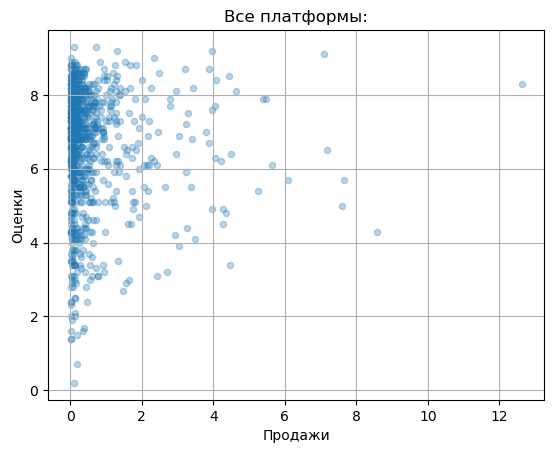

In [117]:
data_actual_period[data_actual_period['user_score'] >= 0].plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.3, title='Все платформы:', xlabel='Продажи', ylabel='Оценки');

In [118]:
print(data_actual_period[data_actual_period['user_score'] >= 0]['total_sales'].corr(data_actual_period[data_actual_period['user_score'] >= 0]['user_score']))

-0.01307030500248456


Как видно из проведенного анализа, оценки критиков и пользователей оказывают влияние на количество продаж, при этом, оценки критиков оказывают влияние большее, чем оценки пользователей.  
Однако, в целом, влияние оценок как критиков, так и пользователей, незначительное.
Вышесказанное подтверждается и низкой корреляцией между показателями 'total_sales' и 'user/critic_score'.

### **Обзор распределения игр по жанрам. Выявление "прибыльности" жанра:**

#### **Ознакомимся с распределением игр по жанрам:**

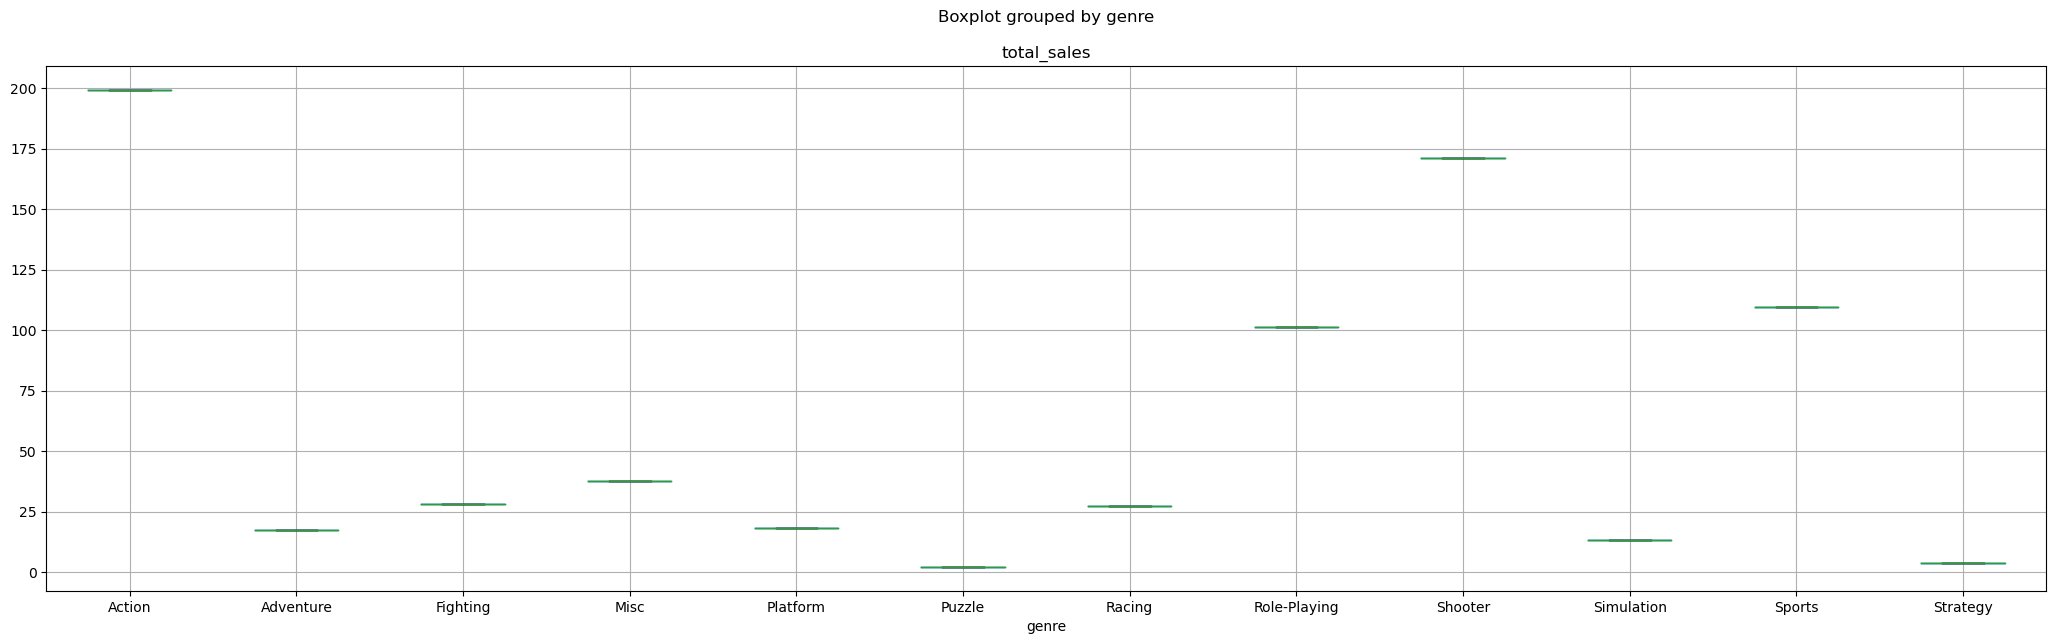

In [119]:
data_actual_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').boxplot(column='total_sales', by='genre', figsize=(25,7));

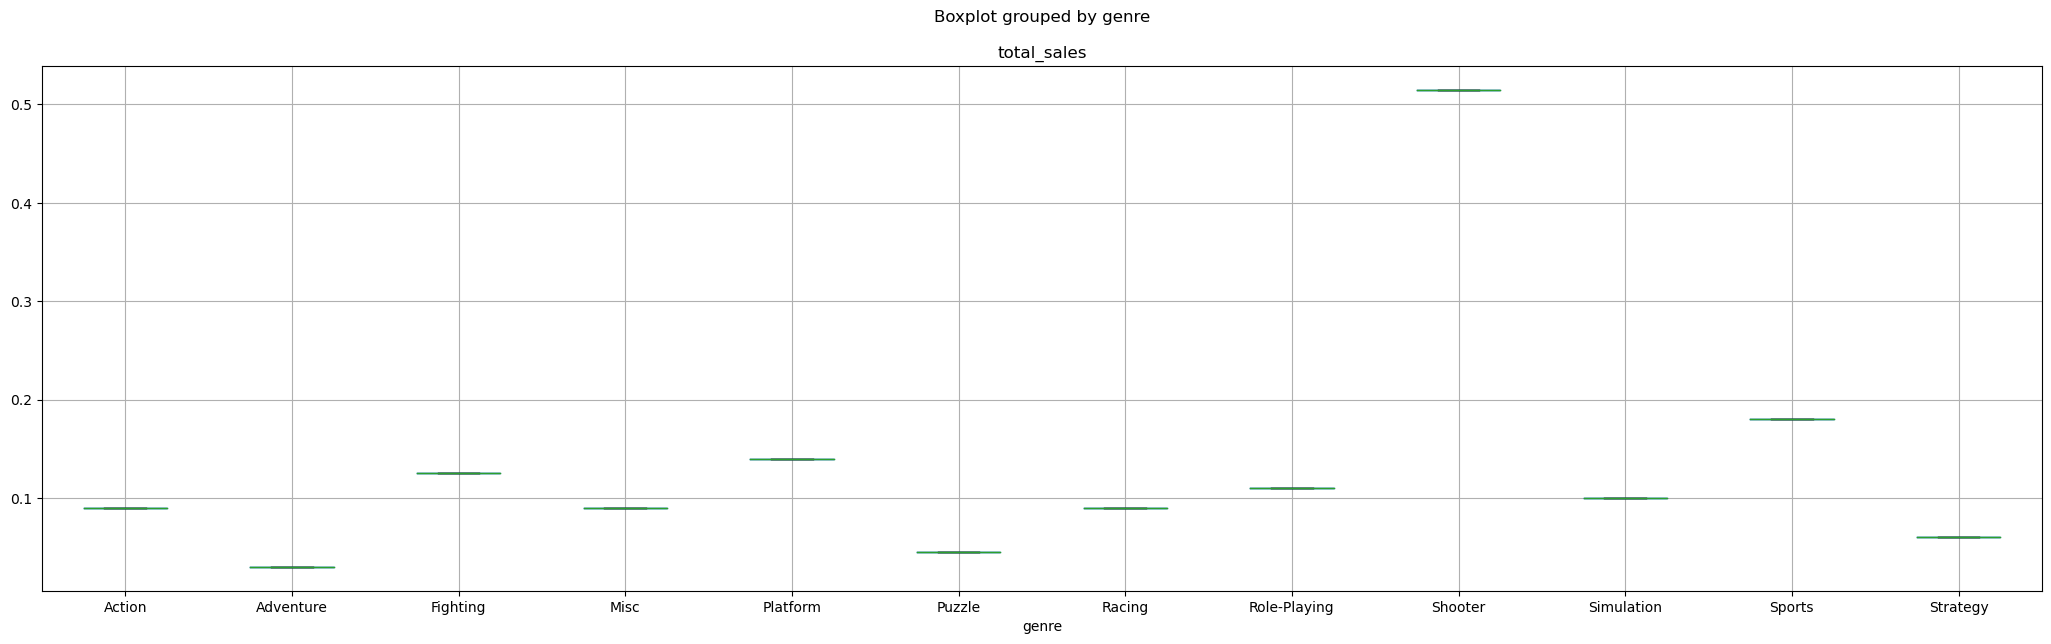

In [120]:
data_actual_period.pivot_table(index='genre', values='total_sales', aggfunc='median').boxplot(column='total_sales', by='genre', figsize=(25,7));

**Установлена "прибыльность" жанров:**

In [121]:
print(data_actual_period.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values('total_sales', ascending=False))

              total_sales
genre                    
Shooter             0.515
Sports              0.180
Platform            0.140
Fighting            0.125
Role-Playing        0.110
Simulation          0.100
Action              0.090
Misc                0.090
Racing              0.090
Strategy            0.060
Puzzle              0.045
Adventure           0.030


Необходимо также учитывать, что из указанных данных, мы видим доходы от продаж, а не прибыль, т.к. нам не известна себестоимость производства игрового продукта.

## Составление портрета пользователя в зависимости от региона (NA, EU, JP):

*Необходимо помнить, что мы рассматриваем актуальный период: 2014-2016 годы.*

### **Выявление самых популярных платформ и различий в долях продаж:**

#### **NA - Северная Америка:**

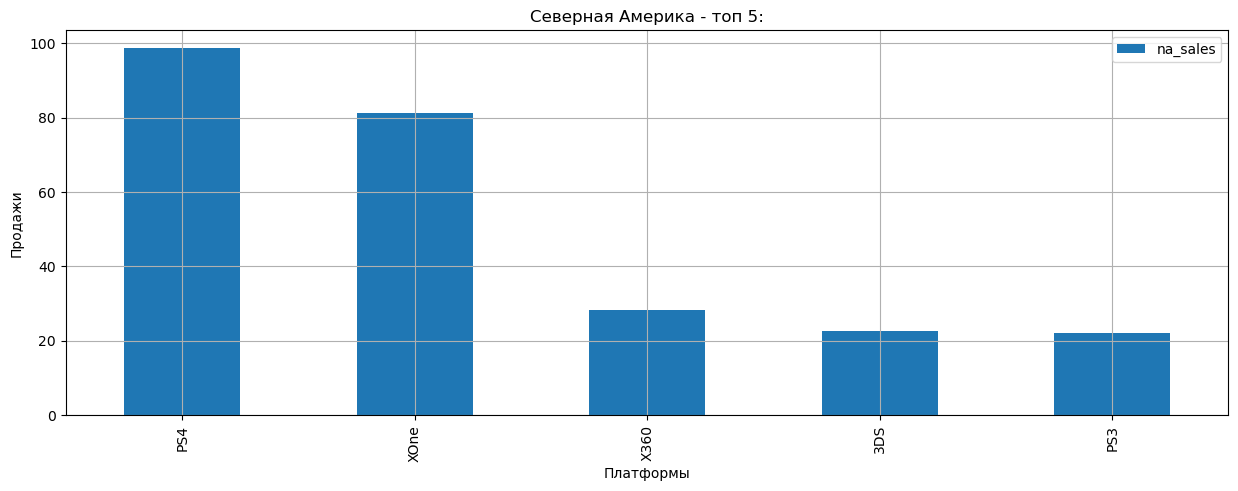

In [122]:
data_actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', grid=True, figsize=(15, 5), title='Северная Америка - топ 5:', xlabel='Платформы', ylabel='Продажи');

In [123]:
print('Топ 5 платформ:', '\n', data_actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5))

Топ 5 платформ: 
           na_sales
platform          
PS4          98.61
XOne         81.27
X360         28.30
3DS          22.64
PS3          22.05


Самыми популярными платформами со значительным (более чем 2 в раза) отрывом для Северной Америки являются 'ps4' (98млн.копий) и 'xone' (81млн.копий).  
Данные платформы являются "наследниками" (версиями следующего поколения) для платформ 'ps3' и 'x360'. Так как с выходом новой версии платформы - динамика продаж по старой начинает стремиться к нулю, данный факт позволяет нам воспринимать показатели объединенно по группам (платформам):
- 'ps3' и 'ps4,
- 'x360' и 'xone'.  

Таким образом, безоговорочными лидерами продаж являются являются 'ps4' и 'xone'.

#### **EU - Европа:**

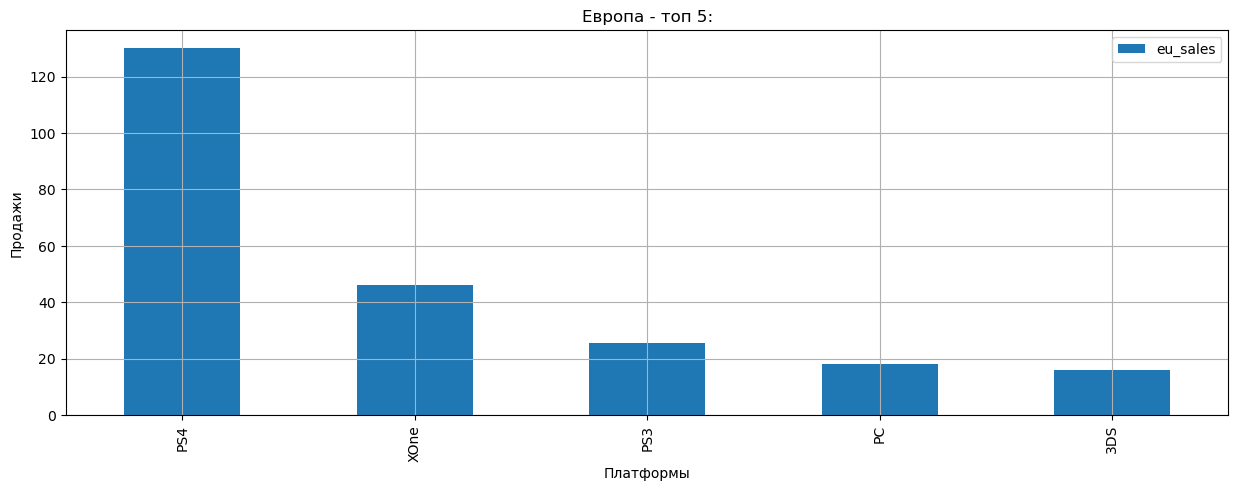

In [124]:
data_actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', grid=True, figsize=(15, 5), title='Европа - топ 5:', xlabel='Платформы', ylabel='Продажи');

In [125]:
print('Топ 5 платформ:', '\n', data_actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5))

Топ 5 платформ: 
           eu_sales
platform          
PS4         130.04
XOne         46.25
PS3          25.54
PC           17.97
3DS          16.12


Самой популярной платформой со значительным (более чем в 3 раза) отрывом для Европы является 'ps4' (130млн.копий). На второй позиции 'xone' (46млн.копий).  

#### **JP - Япония:**

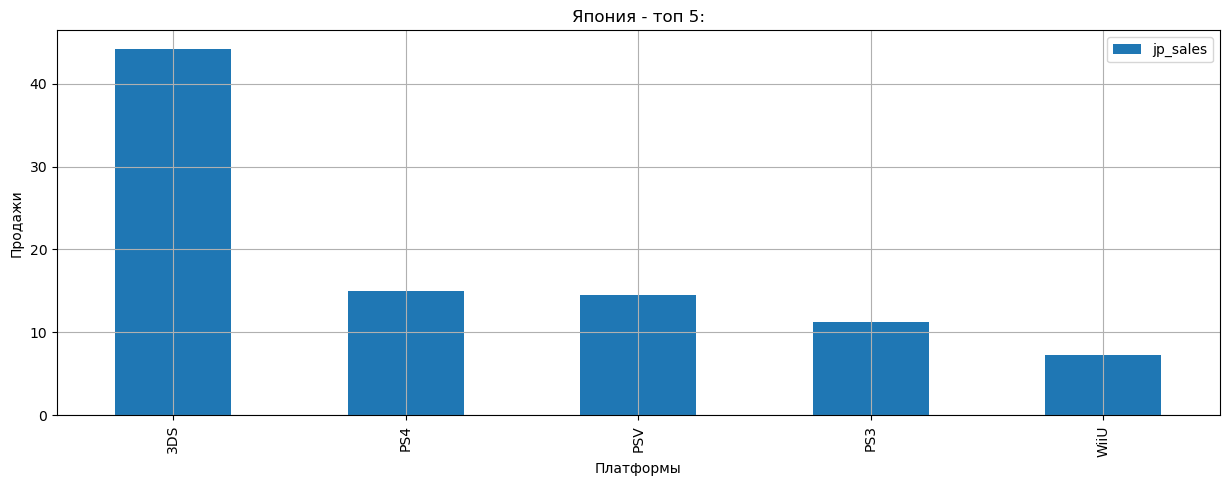

In [126]:
data_actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', grid=True, figsize=(15, 5), title='Япония - топ 5:', xlabel='Платформы', ylabel='Продажи');

In [127]:
print('Топ 5 платформ:', '\n', data_actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5))

Топ 5 платформ: 
           jp_sales
platform          
3DS          44.24
PS4          15.02
PSV          14.54
PS3          11.22
WiiU          7.31


Для Японии картина кардинально иная - лидером продаж является '3ds' (44млн.копий) - портативная игровая система производства Nintendo. На втором месте 'ps4' (15млн.копий). Третье место - 'psv' (14млн.копий).  
Мы видим, что для рынка Японии особой популярностью пользуются портативные (мобильные) игровые платформы.

#### **OS - Другие страны:**

Дополнительно посмотрим на платформы по остальным странам:

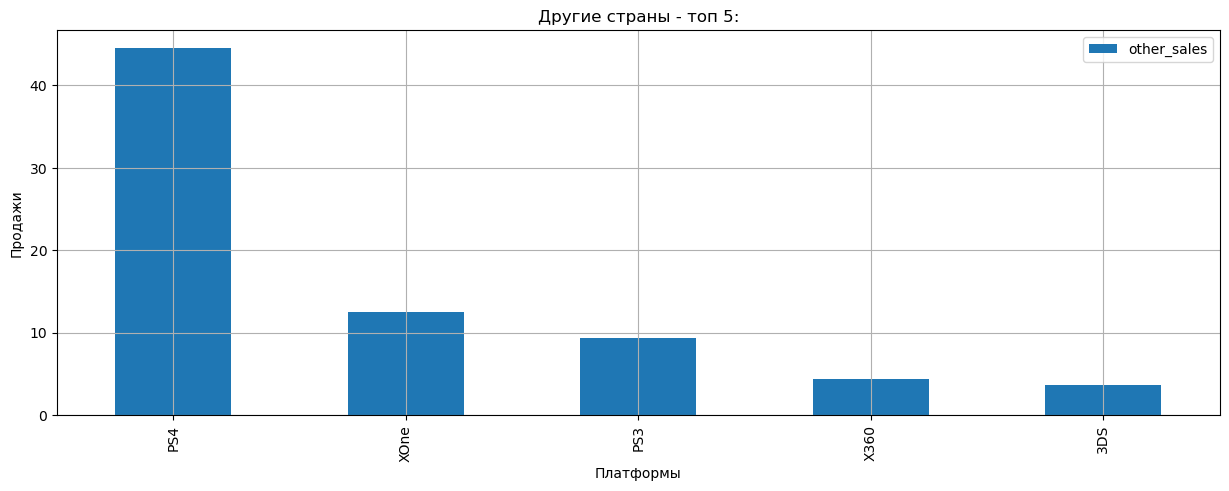

In [128]:
data_actual_period.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head(5).plot(kind='bar', grid=True, figsize=(15, 5), title='Другие страны - топ 5:', xlabel='Платформы', ylabel='Продажи');

In [129]:
print('Топ 5 платформ:', '\n', data_actual_period.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head(5))

Топ 5 платформ: 
           other_sales
platform             
PS4             44.48
XOne            12.52
PS3              9.37
X360             4.35
3DS              3.68


В остальных странах тенденция схожа с европейской - лидером продаж среди платформ является 'ps4' (44млн.копий).

### **Выявление самых популярных игровых жанров:**

#### **NA - Северная Америка:**

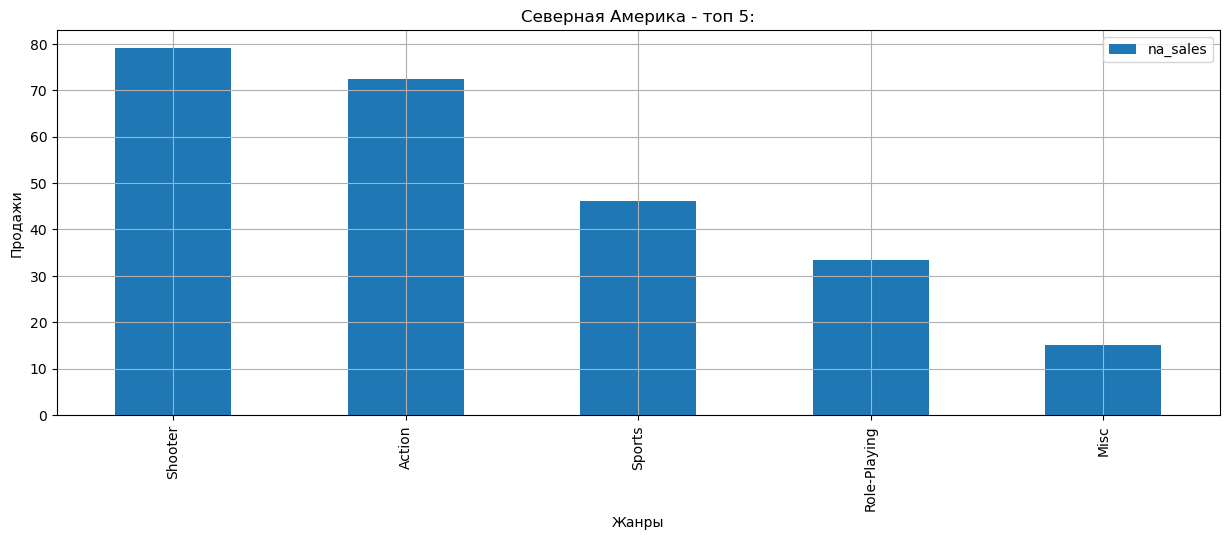

In [130]:
data_actual_period.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', grid=True, figsize=(15, 5), title='Северная Америка - топ 5:', xlabel='Жанры', ylabel='Продажи');

In [131]:
print('Топ 5 жанров:', '\n', data_actual_period.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5))

Топ 5 жанров: 
               na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Role-Playing     33.47
Misc             15.05


Самыми популярными жанрами для Северной Америки являются 'shooter' (79млн.копий) и 'action' (72млн.копий).  

#### **EU - Европа:**

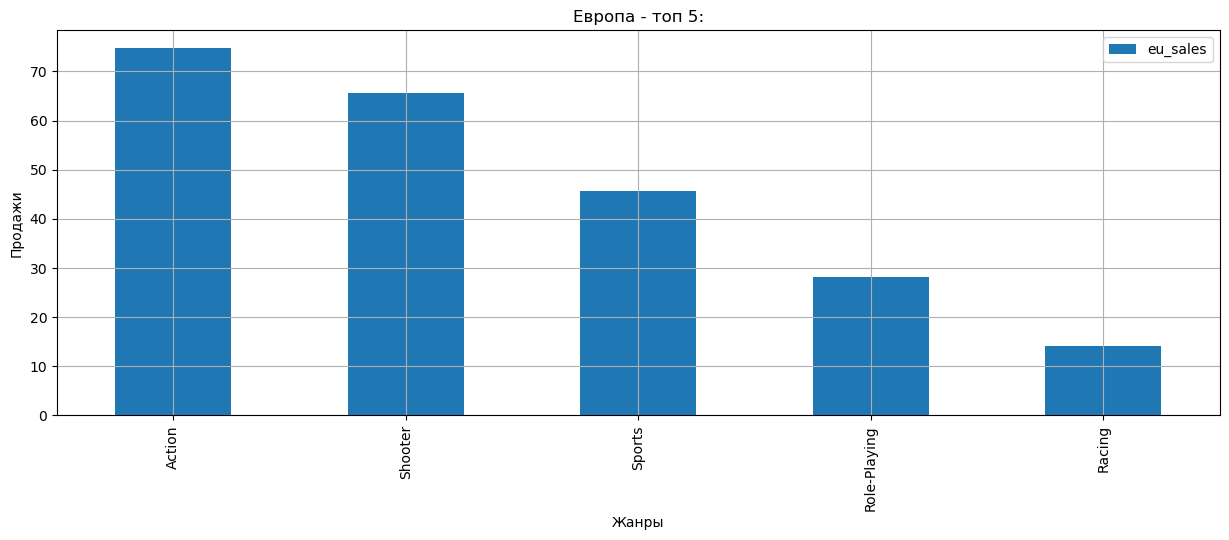

In [132]:
data_actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', grid=True, figsize=(15, 5), title='Европа - топ 5:', xlabel='Жанры', ylabel='Продажи');

In [133]:
print('Топ 5 жанров:', '\n', data_actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5))

Топ 5 жанров: 
               eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Role-Playing     28.17
Racing           14.13


Самыми популярными жанрами для Европы являются 'action' (74млн.копий) и 'shooter' (65млн.копий).  

#### **JP - Япония:**

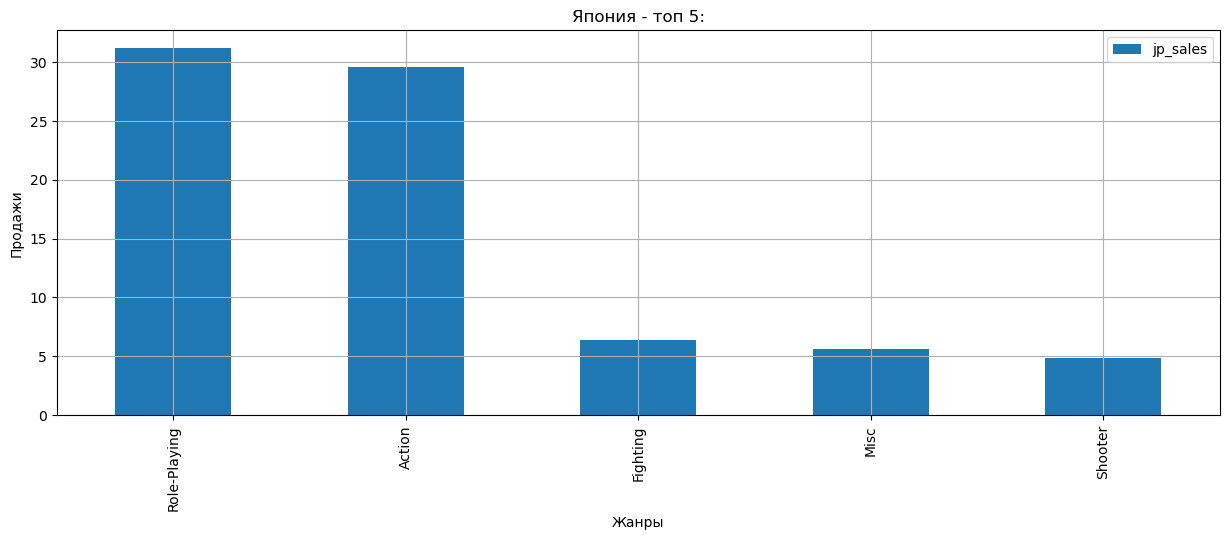

In [134]:
data_actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', grid=True, figsize=(15, 5), title='Япония - топ 5:', xlabel='Жанры', ylabel='Продажи');

In [135]:
print('Топ 5 жанров:', '\n', data_actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5))

Топ 5 жанров: 
               jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Fighting          6.37
Misc              5.61
Shooter           4.87


Самыми популярными жанрами для Японии являются 'role-playing' (31млн.копий) и 'action' (29млн.копий).  
Отличие в жанрах у Японии от остального мира может быть объяснено как культурными особенностями страны, так и большей популярностью портативных (мобильных) игровых платформ, на которых из-за их специфики и эргономики удобнее играть в игры определенных жанров.

#### **OS - Другие страны:**

Дополнительно посмотрим на жанры по остальным странам:

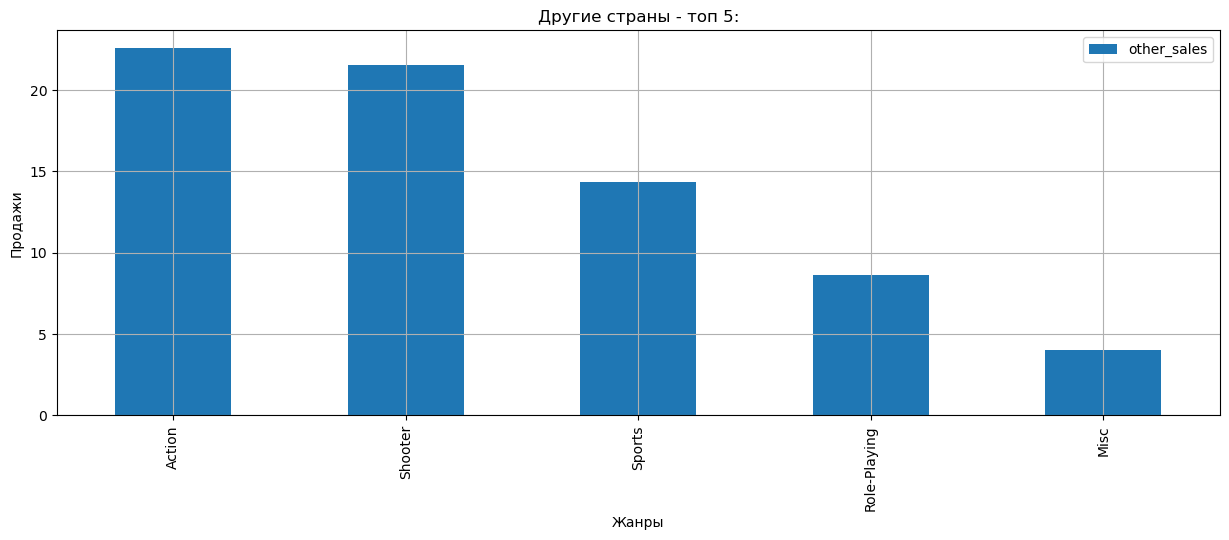

In [136]:
data_actual_period.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head(5).plot(kind='bar', grid=True, figsize=(15, 5), title='Другие страны - топ 5:', xlabel='Жанры', ylabel='Продажи');

In [137]:
print('Топ 5 жанров:', '\n', data_actual_period.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head(5))

Топ 5 жанров: 
               other_sales
genre                    
Action              22.57
Shooter             21.53
Sports              14.36
Role-Playing         8.64
Misc                 4.03


В остальных странах тенденция схожа с европейской - самыми популярными жанрами являются 'action' (22млн.копий) и 'shooter' (21млн.копий).

### **Определение влияния рейтинга ESRB на продажи в отдельных регионах:**

*В данном блоке мы проведем анализ попарно, используя столбцы:*
- *'rating' - исходный*
- *'rating_edit' - обработанный (пропуски заменены на 'not_in_esrb')*

**Обозначения рейтингов:*
- 'E' ('everyone') - для всех
- 'T' ('teen') - подростки
- 'M' ('mature') - для взрослых
- 'E10+' ('everyone 10 and older') - для всех от десяти лет и старше

#### **NA - Северная Америка:**

*Исходные данные:*

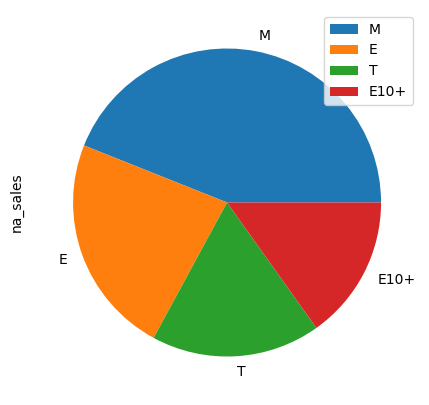

In [138]:
data_actual_period.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='pie', subplots=True, figsize=(15, 5));

In [139]:
print('Исходные данные:', '\n', data_actual_period.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5))

Исходные данные: 
         na_sales
rating          
M          96.42
E          50.74
T          38.95
E10+       33.23


*Обработанные данные:*

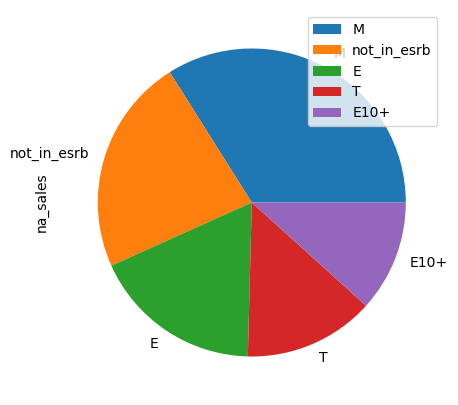

In [140]:
data_actual_period.pivot_table(index='rating_edit', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='pie', subplots=True, figsize=(15, 5));

In [141]:
print('Обработанные данные:', '\n', data_actual_period.pivot_table(index='rating_edit', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5))

Обработанные данные: 
              na_sales
rating_edit          
M               96.42
not_in_esrb     64.72
E               50.74
T               38.95
E10+            33.23


В Северной Америке со значительным отрывом лидируют продажи игр с рейтингом 'M'.  
На втором месте расположены игры, которым рейтинг ESRB не присвоен.  
Третье место занимают игры с рейтингом 'E', четвертое - с рейтингом 'T'.  
На пятом месте игры с рейтингом 'E10+'.

По указанным данным можно сделать вывод, что основные потребители видеоигр в Северной Америке - люди старше 17 лет.

#### **EU - Европа:**

*Исходные данные:*

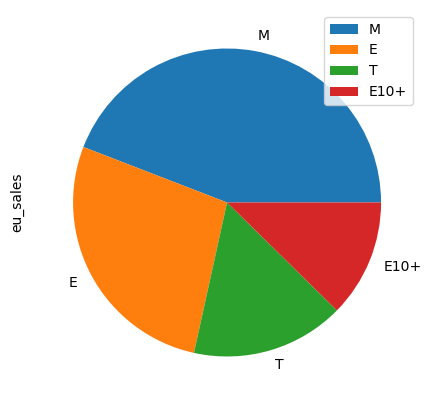

In [142]:
data_actual_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(kind='pie', subplots=True, figsize=(15, 5));

In [143]:
print('Исходные данные:', '\n', data_actual_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5))

Исходные данные: 
         eu_sales
rating          
M          93.44
E          58.06
T          34.07
E10+       26.16


*Обработанные данные:*

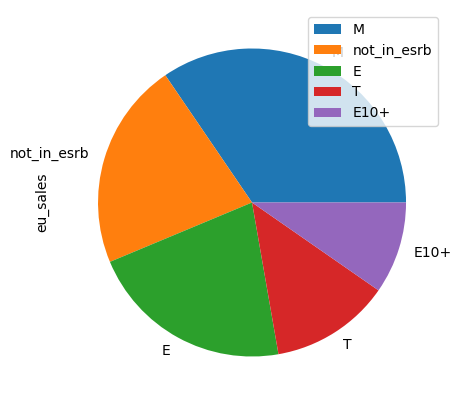

In [144]:
data_actual_period.pivot_table(index='rating_edit', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(kind='pie', subplots=True, figsize=(15, 5));

In [145]:
print('Обработанные данные:', '\n', data_actual_period.pivot_table(index='rating_edit', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5))

Обработанные данные: 
              eu_sales
rating_edit          
M               93.44
not_in_esrb     58.95
E               58.06
T               34.07
E10+            26.16


В Европе, как и в Северной Америке, со значительным отрывом лидируют продажи игр с рейтингом 'M'.  
На втором месте расположены игры, которым рейтинг ESRB не присвоен.  
Третье место занимают игры с рейтингом 'E', четвертое - с рейтингом 'T'.  
На пятом месте игры с рейтингом 'E10+'.

По указанным данным можно сделать вывод, что основные потребители видеоигр в Европе - люди старше 17 лет.

#### **JP - Япония:**

*Исходные данные:*

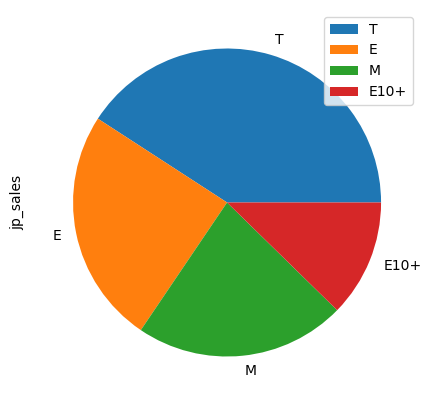

In [146]:
data_actual_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot(kind='pie', subplots=True, figsize=(15, 5));

In [147]:
print('Исходные данные:', '\n', data_actual_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5))

Исходные данные: 
         jp_sales
rating          
T          14.78
E           8.94
M           8.01
E10+        4.46


*Обработанные данные:*

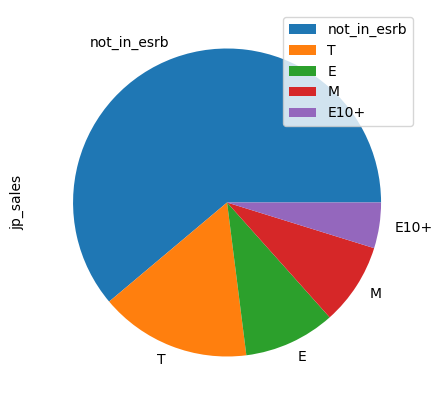

In [148]:
data_actual_period.pivot_table(index='rating_edit', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot(kind='pie', subplots=True, figsize=(15, 5));

In [149]:
print('Обработанные данные:', '\n', data_actual_period.pivot_table(index='rating_edit', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5))

Обработанные данные: 
              jp_sales
rating_edit          
not_in_esrb     56.90
T               14.78
E                8.94
M                8.01
E10+             4.46


В Японии со значительным отрывом лидируют продажи, которым рейтинг ESRB не присвоен.  
Второе место занимают игры с рейтингом 'T'.  
На третьем месте игры с рейтингом 'E'.  
На четвертом месте игры с рейтингом 'M'  
На пятом месте игры с рейтингом 'E10+'.

По указанным данным можно сделать вывод, что основные потребители видеоигр в Японии - люди от 13 до 17 лет. Также популярны игры, которым рейтинг ESRB не присвоен.

#### **OS - Другие страны:**

Дополнительно посмотрим на жанры по остальным странам:

*Исходные данные:*

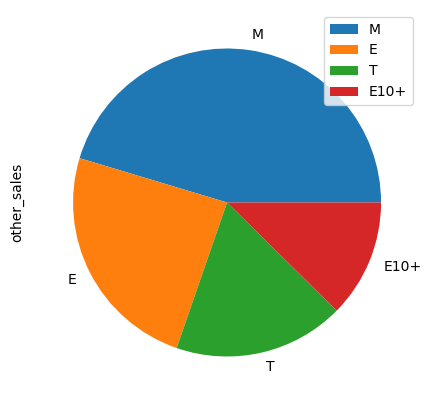

In [150]:
data_actual_period.pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).plot(kind='pie', subplots=True, figsize=(15, 5));

In [151]:
print('Исходные данные:', '\n', data_actual_period.pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head(5))

Исходные данные: 
         other_sales
rating             
M             28.67
E             15.39
T             11.33
E10+           7.83


*Обработанные данные:*

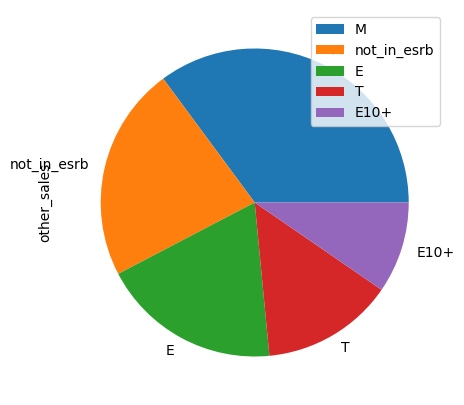

In [152]:
data_actual_period.pivot_table(index='rating_edit', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).plot(kind='pie', subplots=True, figsize=(15, 5));

In [153]:
print('Обработанные данные:', '\n', data_actual_period.pivot_table(index='rating_edit', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head(5))

Обработанные данные: 
              other_sales
rating_edit             
M                  28.67
not_in_esrb        18.40
E                  15.39
T                  11.33
E10+                7.83


В остальных странах, так же как в Европе и в Северной Америке, лидируют продажи игр с рейтингом 'M'.  
На втором месте расположены игры, которым рейтинг ESRB не присвоен.  
Третье место занимают игры с рейтингом 'E', четвертое место - с рейтингом 'T'.  
На пятом месте игры с рейтингом 'E10+'.

По указанным данным можно сделать вывод, что основные потребители видеоигр в остальных странах - люди старше 17 лет.

## Проверка гипотез:

### **Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые":**

**Нулевая гипотеза (H₀):** "Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**"  

**Альтернативная гипотеза (H₁):** "Средние пользовательские рейтинги платформ Xbox One и PC **не одинаковые**"

In [154]:
hypothesis_for_xone = data_actual_period[(data_actual_period['platform'] == 'XOne') & (data_actual_period['year_of_release'] >= 2014) & (data_actual_period['critic_score'] >= 0) & (data_actual_period['user_score'] >= 0)]['user_score']
hypothesis_for_pc = data_actual_period[(data_actual_period['platform'] == 'PC') & (data_actual_period['year_of_release'] >= 2014) & (data_actual_period['critic_score'] >= 0) & (data_actual_period['user_score'] >= 0)]['user_score']

In [155]:
alpha = 0.05

results = st.ttest_ind(hypothesis_for_xone, hypothesis_for_pc, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

p-значение: 0.1403785186826978
Не удалось отвергнуть нулевую гипотезу


**При анализе данных за актуальный период (2014-2016гг.) не удалось отвергнуть нулевую гипотезу - т.е. рейтинги платформ Xbox One и PC одинаковые.**

### **Гипотеза 2: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные":**

**Нулевая гипотеза (H₀):** "Средние пользовательские рейтинги жанров 'action' и 'sports' **одинаковые**"  

**Альтернативная гипотеза (H₁):** "Средние пользовательские рейтинги жанров 'action' и 'sports' **не одинаковые**"

In [156]:
hypothesis_for_genre_action = data_actual_period[(data_actual_period['genre'] == 'Action') & (data_actual_period['year_of_release'] >= 2014) & (data_actual_period['critic_score'] >= 0) & (data_actual_period['user_score'] >= 0)]['user_score']
hypothesis_for_genre_sports = data_actual_period[(data_actual_period['genre'] == 'Sports') & (data_actual_period['year_of_release'] >= 2014) & (data_actual_period['critic_score'] >= 0) & (data_actual_period['user_score'] >= 0)]['user_score']

In [157]:
alpha = 0.05

results = st.ttest_ind(hypothesis_for_genre_action, hypothesis_for_genre_sports, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

p-значение: 8.327612976032047e-09
Отвергаем нулевую гипотезу


**При анализе данных за актуальный период (2014-2016гг.) не удалось отвергнуть нулевую гипотезу - т.е. средние пользовательские рейтинги жанров 'action' и 'sports' разные.**

В данном исследовании нулевые гипотезы формировались по единому принципу - они всегда формулируются так, чтобы использовать знак равенства:
- рейтинги платформ Xbox One и PC одинаковые (равные)
- рейтинги жанров 'action' и 'sports' одинаковые (равные)  
  
Альтернативные гипотезы, соответственно, формируются как противоречащие нулевым гипотезам.

В данном исследовании нам необходимо сравнивать средние двух генеральных совокупностей между собой, для этого применим метод "ttest_ind". В нашем случае "equal_var=False", так как дисперсии выборок не равны.

In [158]:
print(hypothesis_for_xone.describe())
print()
print(hypothesis_for_pc.describe())
print()
print(hypothesis_for_genre_action.describe())
print()
print(hypothesis_for_genre_sports.describe())

count    151.000000
mean       6.620530
std        1.318854
min        2.100000
25%        5.850000
50%        6.800000
75%        7.650000
max        9.200000
Name: user_score, dtype: float64

count    115.000000
mean       6.341739
std        1.660268
min        1.400000
25%        5.400000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

count    227.000000
mean       6.832599
std        1.344077
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.000000
Name: user_score, dtype: float64

count    83.000000
mean      5.684337
std       1.493684
min       1.500000
25%       4.650000
50%       5.900000
75%       6.750000
max       8.700000
Name: user_score, dtype: float64


## Вывод:

Для анализа использовался датафрейм о деятельности интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.  

**В ходе анализа проведена предобработка данных:**
- Заменены названия столбцов (приведены к нижнему регистру).
- Данные преобразованы в нужные типы (столбцы: 'year_of_release', 'user_score').
- Обработаны пропуски (столбцы: 'name', 'year_of_release', 'critic_score', 'user_score', 'rating').
- Создан новый столбец 'total_sales', в котором посчитаны суммарные продажи во всех регионах.
- Установлено отсутствие дубликатов.

**В ходе исследовательского анализа данных:**
- Установлено **количество выпущенных игр в разные годы** (пик максимального количества выпущенных игр пришелся на 2008-2009гг.).
- Исследованы **изменения продаж по платформам**, определены **платформы с наибольшими суммарными продажами** ('ps', 'x360', 'ps3', 'wii', 'ds', 'ps'). Определен жизненный цикл платформ (от 4 до 8 лет).
- Определен **актуальный период исследования** (2014-2016гг.).
- Установлены **лидеры среди платформ по числу продаж в актуальном периоде** ('ps4', 'xone', '3ds'). Установлено, что будущими потенциально прибыльными платформами являются 'ps4' и 'xone'.
- Определена **зависимость продаж внутри каждой платформы от оценок и отзывов пользователей и критиков** - в целом, влияние оценок как критиков, так и пользователей, незначительное, что также подтверждается низкой корреляцией между показателями 'total_sales' и 'user/critic_score'.
- Сделан **обзор распределения игр по жанрам**, выявлена "прибыльность" жанра:
    - занимают лидирующие позиции: 'shooter', 'sports' и 'platform'
- Составлен **портрет пользователя** в зависимости от региона:
    - *для Северной Америки* самые популярные платформы 'ps4' и 'xone', самые популярные жанры 'shooter' и 'action', самые популярные игры с рейтингом 'M',
    - *для Европы* самая популярная платформа 'ps4', самые популярные жанры 'action' и 'shooter', самые популярные игры с рейтингом 'M',
    - *для Японии* самая популярная платформа '3ds', самые популярные жанры 'role-playing' и 'action', самые популярные игры, которым не присвоен рейтинг ESRB,
    - *для остальных стран* самая популярная платформа 'ps4', самые популярные жанры 'action' и 'shooter', самые популярные игры с рейтингом 'M'.



**Проверены гипотезы:**  
**Гипотеза 1:** "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые":
- *Нулевая гипотеза (H₀): "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"*
- *Альтернативная гипотеза (H₁): "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые"* 
    
рейтинги платформ Xbox One и PC одинаковые для актуального периода, и разные для всего периода исследования.  
  
  
**Гипотеза 2:** "Средние пользовательские рейтинги жанров 'action' и 'sports' разные" - 
- *Нулевая гипотеза (H₀): "Средние пользовательские рейтинги жанров 'action' и 'sports' одинаковые"*
- *Альтернативная гипотеза (H₁): "Средние пользовательские рейтинги жанров 'action' и 'sports' разные"*  

средние пользовательские рейтинги жанров 'action' и 'sports' разные для актуального и для всего периода исследования.

**По результатам проведенного анализа, можно сделать выводы, что целесообразнее всего использовать рекламный бюджет для игр на платформах 'PS4' и 'XOne', жанра 'shooter', с рейтингом от 'ESRB' - 'M' для региона Северной Америки (или Европы). В ходе рекламной кампании следует принимать во внимание отзывы критиков, но не строить кампанию исходя из них.**